# bc-MC consumption-savings problem

# The model

We consider the following consumption-saving problem, similar to the model in Maliar et al (2021):

$$
\begin{gather*}
\underset{\left\{ c_{t},w_{t+1}\right\}_{t=0}^{\infty }}{\max }E_{0}\left[
\sum_{t=0}^{\infty }\exp (\delta_{t})\beta ^{t}u\left( {c_{t}}\right)\right]  \\
\text{s.t. }w_{t+1}=\left( w_{t}-c_{t}\right) \overline{r}\exp (r_{t+1})+\exp
(y_{t+1}), \\
c_{t} \leq w_{t} + b,
\end{gather*}
$$


where $c_{t}$ is consumption; $w_{t}$ is the beginning-of-period
cash-on-hand; $\beta \in \left[ 0,1\right)$ is a subjective discount
factor;  $\overline{r}\in \left( 0,\frac{1}{\beta }\right)$ is a (gross)
constant interest rate; and initial condition $\left( z,w\right)$ is given.
There is an occasionally binding inequality constraint: consumption $c_{t}$
**CAN** exceed cash-on-hand $w_{t}$, because of borrowing. There are four different exogenous
state variables, namely, shocks to the interest rate $r_{t}$, discount factor $\delta_t$,
transitory component of income $q_{t}$ and permanent
component of income $p_{t}$. The total income is $y_{t}=\exp(p_{t})\exp(q_{t})$. All
exogenous variables  follow AR(1) processes: 


$$
\begin{eqnarray*}
{q_{t+1}} &=&\rho_{q}{q_{t}}+\sigma_{q}\epsilon^{q}_{t+1}, \\
{p_{t+1}} &=&\rho_{p}{p_{t}}+\sigma_{p}\epsilon^{p}_{t+1}, \\
{r_{t+1}} &=&\rho_{r}{r_{t}}+\sigma_{r}\epsilon^{r}_{t+1}, \\
{\delta_{t+1}} &=&\rho_{\delta }{\delta_{t}}+\sigma_{\delta }\epsilon^{\delta}_{t+1},
\end{eqnarray*}
$$


where $\epsilon^i_t \sim \mathcal{N}\left( 0,1\right)$. We assume the Cobb-Douglas utility function $u\left( {c_{t}}\right) =\frac{1}{1-\gamma }\left( c_{t}^{1-\gamma }-1\right)$.

## Euler equation of the model

Expectation is with respect to 4 shocks: $\varepsilon = (q, p, r, \delta)$


$$
\begin{gather*}
\max\Big( \beta \overline{r}E_{\epsilon }\left[ \frac{u^{\prime }\left(
c^{\prime }\right) }{u^{\prime }(c)}\exp \left(   \delta ^{\prime }-\delta
+r^{\prime }\right)  \right], \frac{u'(w + b)}{u'(c)} \Big) - 1 = 0
\end{gather*}
$$

Unit less measure of accuracy:

$$
\begin{gather*}
1 - \frac{1}{c} (u^{\prime})^{-1} \Big[\max \Big( \beta \overline{r}E_{\epsilon }\left[ u^{\prime }\left(
c^{\prime }\right) \exp \left( \delta ^{\prime }-\delta
+r^{\prime }\right), u^{\prime}(w + b) \Big) \right] = 0
\end{gather*}
$$

## ANN formulation and the bc-MC operator

The solution to this dynamic programming problems is characterized by the following Kuhn-Tucker conditions:

\begin{equation}\label{eq:KT_BC}
\begin{split}
A \geq 0, H \geq 0, AH = 0 \\
A \equiv w - c\\
H \equiv u'(c) - \beta \bar{r} E_{\varepsilon} \Big[u'(c')\exp(\delta' + \delta - r')\Big]
\end{split}
\end{equation}

The loss function for the ANN is:

\begin{equation}
\begin{split}
    \mathcal{L}(\theta) & =  \mu_1 E_{s}\Big[  \Big(  E_{\varepsilon}\Big[\beta \bar{r} \frac{u'(c(s'|\theta))}{u(c(s|\theta))}\exp(\delta' + \delta - r') - h(s|\theta) \Big] \Big)^2 \Big] \\
    & + \mu_2 \Big( E_{s} \Big[ \Psi\Big(1 - \frac{c(s|\theta)}{w}, 1 - h(s|\theta)\Big)^2 \Big] \Big)
    \end{split}
\end{equation}


We use the Fischer-Burmeister (FB) function, defined by $\Psi(a, h) \equiv a + h - \sqrt{a^2 + h^2}$. The FB function is such that when it is equal to 0, the Kuhn-Tucker conditions are satisfied: $\Psi (a, h) = 0 \Leftrightarrow a \geq 0, h \geq 0, ah = 0 $ (see for instance Chen et al, 2000). 

Using the bc-MC estimator:

\begin{equation}\label{eq:loss_function_bc_1}
\begin{split}
    \mathcal{L}^U_{M,N}(\theta) & =  \mu_1 \frac{2}{MN(N-1)} \sum_{m=1}^{M} \sum_{1 \leq i < j}^{N}  f(s_m,\epsilon^i_m|\theta) f(s_m,\epsilon^j_m|\theta) \\
    & + \mu_2 \frac{1}{M} \sum_{m=1}^{M}   \Psi\Big(1 - \frac{c(s_m|\theta)}{w_m}, 1 - h(s_m|\theta)\Big)^2
\end{split}
\end{equation}

with $f(s,\epsilon|\theta) \equiv \beta \bar{r} \frac{u'(c(s'|\theta))}{u(c(s|\theta))}\exp(\delta' + \delta - r') - h(s|\theta) $

## Vectorization scheme



$$ \frac{1}{M} \frac{2}{(N)(N-1)} \sum_{m=1}^{M} \sum_{1\leq i < j}^{n} f(s_m, \epsilon_{m}^{(i)})f(s_m, \epsilon_{m}^{(j)})  $$

can be vectorized as follows:

$$ f' \Big(I_M \otimes U_N\Big). f $$

With:

- U_N an upper triangular matrix filled with 1, and zeroes on the diagonal $N \times N$
- $I_{M,M}$ the identity matrix $M \times M$
- f a $MN\times 1$ vector:

$$ \Big(f(s_1, \varepsilon^{1}_{1}), f(s_1, \varepsilon^{2}_{1}),  ..., f(s_2, \varepsilon^{1}_{2}), ... , f(s_m, \varepsilon^{N}_{m})\Big)$$

## Structure of this notebook

    0. Dependencies
        Load packages and define useful functions and types.
    I. Time iteration
        Solve the model using the TI algorithm
    II. bc-MC operator for a given M and N
        Solve the model using the bc-MC operator, single run of stochastic gradient descent (SGD)
    III. Find optimal M and N. 
        Select M and N to minimize the variance of the loss function
    III.A. Binding constraint
        Find optimal M and N. Run several iterations of SGD. Compare with non-optimal choice.
    III.B. Less binding constraint
        Same as section III.A., but with a less binding borrowing constraint.

# 0. Dependencies 

You can use 'pip' to install dependencies.

In [31]:
# Magic Commands
%matplotlib inline

# Built-in Python Libraries
import copy
import datetime
import itertools
import os
import random
import time
from math import sqrt

# Matplotlib Libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Tensorflow
import tensorflow as tf

# PyTorch Libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchcontrib.optim import SWA

# Pandas and Numpy
import pandas as pd
import numpy as np

# Scipy Libraries
import scipy.stats
from scipy import sparse
from scipy.interpolate import griddata
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import RegularGridInterpolator
from scipy.stats import norm

# Seaborn Libraries
import seaborn as sns; sns.set()

# tqdm Library
from tqdm import tqdm

# Numba Libraries
from numba import njit, float64
from numba.experimental import jitclass

# Regressions
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Quantecon Libraries
import quantecon as qe
from quantecon.optimize import brentq

# Other Libraries
import chaospy  # for quadrature (expectations)
from interpolation import interp

from typing import Tuple
class Vector: pass


In [2]:
# Display version of python currently used
!python3 --version

Python 3.8.10


In [3]:
# Display which version of packages I am using
!pip freeze > requirements.txt
!cat requirements.txt

absl-py==1.0.0
aiodns==3.0.0
aiohttp==3.8.3
aiosignal==1.2.0
alabaster==0.7.8
altair==5.0.0
appdirs==1.4.4
apturl==0.5.2
argon2-cffi==21.1.0
arviz==0.15.1
astunparse==1.6.3
async-generator==1.10
async-timeout==4.0.1
attrs==21.2.0
Babel==2.6.0
backcall==0.2.0
backports.zoneinfo==0.2.1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bleach==4.1.0
blinker==1.4
bokeh==2.4.2
bottle==0.12.19
branca==0.4.2
Brlapi==0.7.0
Brotli==1.0.9
bs4==0.0.1
cached-property==1.5.1
cachetools==4.2.4
cattrs==1.9.0
cchardet==2.1.7
ccsm==0.9.14.1
certifi==2019.11.28
cffi==1.15.0
chaospy==4.3.8
chardet==3.0.4
charset-normalizer==2.0.7
chrome-gnome-shell==0.0.0
Click==7.0
click-plugins==1.1.1
cligj==0.7.2
cmake==3.21.4
colorama==0.4.3
command-not-found==0.3
compizconfig-python==0.9.14.1
conan==1.42.1
contourpy==1.0.7
corner==2.2.1
cryptography==2.8
cupshelpers==1.0
cycler==0.11.0
DateTime==4.3
dblatex===0.3.11py3
DBnomics==1.2.3
dbus-python==1.2.16
debugpy==1.5.1
decorator==5.1.0
defer==1.0.6
defusedxml==0.7.1
dell-recovery

In [4]:
# Import functions from a notebook
%run functions-bc-MC-consumption-savings.ipynb
# Set default figsize
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
# Controlling fontsizes
SMALL_SIZE = 12
MEDIUM_SIZE = SMALL_SIZE + 2
BIGGER_SIZE =  SMALL_SIZE + 4
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE
dpi_chosen=150 #control the quality of .png
linewidth_chosen = 2
save_to_csv = True
read_from_csv = False

Using cpu device


In [5]:
seed_number = 1234
random.seed(seed_number) # For replicability reasons
print(random.random()) 

0.9664535356921388


In [6]:
current_wd = os.getcwd() 
output_folder = current_wd  + "/output/"
# Create folder if does not exist:
if not os.path.exists(output_folder):
    # If it doesn't exist, create it
    os.makedirs(output_folder)

In [7]:
# Store parameters
class MyParams():
    """
    M: number of draws for the state variable
    N: number of draws for shocks
    lr: learning rate
    pre_train_model: whether or not pre-train the model before starting the full training loop (not used)
    nb_epochs: number of gradient descent steps during training
    bc: borrowing constraint 
    order_gauss: order for the Gaussian quadrature to use when solving with time iteration
    σ_shocks: parameter determining the variance of shocks
    use_Sobol: whether or not use Sobol sampling for the state space
    optimizer: what type of optimizer to use when training neural network
    w1: weight on the first element of the loss function
    w2: weight on the second element in the loss function
    """
    def __init__(self, N, M, lr, pre_train_model, 
                 nb_epochs, bc, order_gauss, σ_shocks, use_Sobol, optimizer,
                 w1, w2):
        # savings-consumption with binding constraint
        # Model parameters
        self.β = 0.9 
        self.γ = 2.0
        self.one_min_γ = 1 - self.γ
        self.σ_shocks = 0.01 #
        self.σ_r = σ_shocks #
        self.ρ_r = 0.9 #
        self.σ_p = self.σ_shocks
        self.ρ_p = 0.9 #
        self.σ_q = self.σ_shocks
        self.ρ_q = 0.9
        self.σ_δ = self.σ_shocks
        self.ρ_δ = 0.9 #0.2
        self.rbar = 1.04
        # Level of borrowing constraint
        self.bc = bc
        self.bc_torch = torch.tensor([bc])
        # Standard deviations for ergodic distributions of exogenous state variables
        self.σ_e_r = self.σ_r/(1-self.ρ_r**2)**0.5
        self.σ_e_p = self.σ_p/(1-self.ρ_p**2)**0.5
        self.σ_e_q = self.σ_q/(1-self.ρ_q**2)**0.5
        self.σ_e_δ = self.σ_δ/(1-self.ρ_δ**2)**0.5
        # grids
        self.n_points_grid = 3 #nb points for (r,p,q δ)
        self.n_points_w = 10 #nb points for w
        self.r_min = -2*self.σ_e_r 
        self.r_max = 2*self.σ_e_r 
        self.p_min = -2*self.σ_e_p
        self.p_max = 2*self.σ_e_p 
        self.q_min = -2*self.σ_e_q 
        self.q_max = 2*self.σ_e_q 
        self.δ_min = -2*self.σ_e_δ
        self.δ_max = 2*self.σ_e_δ
        # bounds for endogenous state variable (cash-in-hand)
        self.wmin = 0.1
        self.wmax = 4.0
        self.r_grid = np.linspace(self.r_min, self.r_max, self.n_points_grid)
        self.p_grid = np.linspace(self.p_min, self.p_max, self.n_points_grid)
        self.q_grid = np.linspace(self.q_min, self.q_max, self.n_points_grid)
        self.δ_grid = np.linspace(self.δ_min, self.δ_max, self.n_points_grid)
        self.w_grid = np.linspace(self.wmin, self.wmax, self.n_points_w)
        self.wrpqδ_grid = list(itertools.product(self.w_grid, self.r_grid, self.p_grid, self.q_grid, self.δ_grid)) #Cartesian product
        # Functions
        self.u = lambda c: (1/self.one_min_γ)*(c**(self.one_min_γ) - 1)
        self.u_prime =  lambda c: c**(-self.γ)
        self.u_prime_inv =  lambda c: c**(-(1/self.γ))
        # Standard shocks
        σ_e = 0.5 #
        μ_e = 0.0 #location parameter shocks
        # Values passed as inputs
        self.N = N #number of draws inside expectation
        self.M = M #number of draws outside expecation
        self.MN = int(M*N)
        # To keep constant the number of function evaluations
        self.T = int((M*N)/2) #number of draws all in on expectation
        self.x_distribution = "Uniform" #"Normal" #Uniform or Normal
        self.σ_e = σ_e
        self.μ_e = μ_e
        self.e_distribution = "Lognormal" #"Normal"
        self.x_low = self.wmin
        self.x_high = self.wmax
        # Vectorized Monte Carlo requires the creation of some objects
        # To repeat vectors
        repeat_vector = torch.ones(N) #to repeat the same value n times using a matrix multiplication
        # To calculate the expectation wrt future shocks using a matrix multiplication
        A = sparse.eye(M) 
        B = sparse.csr_matrix(np.ones(N)/N)
        # Sparse kronecker product. Then convert to pytorch sparse
        # W used using the sum((sum)^2) formula
        W = sparse_mx_to_torch_sparse_tensor(sparse.kron(A, B))
        self.repeat_vector = repeat_vector
        self.W = W  
        # W used using the 2/N(N-1) sum() formula
        self.W_expanded = create_W_expanded_matrix(self.M, self.N)
        # Learning parameters
        self.lr = lr
        self.lr_pre_train = 1e-3 #learning rate during pre-training
        self.optimizer = optimizer #"Adam" #default: #Adam or SGD or SWA
        self.freq_gamma = 0.95 #0.85
        self.use_scheduler = False #default: True
        self.pre_train_model = pre_train_model #default: True
        self.nb_epochs = nb_epochs
        self.nb_epochs_pre_train = int(self.nb_epochs/1)
        self.freq_scheduler = 1000 #int(self.nb_epochs/10)
        # Sobol sampling
        self.soboleng = torch.quasirandom.SobolEngine(dimension=1) #sobol draws for income
        self.use_Sobol = use_Sobol #Sobol for dimension M
        self.use_Sobol_T = use_Sobol #Sobol for all-in-one
        # DEBUG PARAMS
        #self.error_correction=True #error correction for the model
        #self.selective_error_correction=False #error correction for the model, only if give positive values
        #self.abs_value=False
        #self.perfect_forecast = False
        #self.fake_bias=0.0
        # GAUSSIAN QUADRATURE
        # value e_r, e_δ, e_p, e_q
        self.distrib = chaospy.J(chaospy.Normal(0, self.σ_r), chaospy.Normal(0, self.σ_δ), chaospy.Normal(0, self.σ_p), chaospy.Normal(0, self.σ_q))
        #self.distrib = chaospy.LogNormal(μ_e, σ_e)
        self.order_gauss = order_gauss
        nodes, weights = dist(self.order_gauss, self.distrib, rule = "gaussian", sp=True)
        self.nodes = nodes
        self.weights = weights
        self.weights_torch = torch.tensor(weights)
        self.nodes_torch = torch.tensor(np.transpose(self.nodes)) #column=dim. Row=observation
        # Save the number of points for the guassian quadrature:
        self.N_gaussian = len(self.weights_torch)
        # Implied number of points for the current space (T=MN/2 <-> M = 2T/N)
        self.M_gaussian = int((2*self.T)/self.N_gaussian)
        self.MN_gaussian = self.N_gaussian*self.M_gaussian
        # Repeat nodes to match the number of function evaluations for the expectation
        self.nodes_torch_repeated = self.nodes_torch.repeat(self.M_gaussian, 1)
        # CREATE A W MATRIX FOR GAUSSIAN QUADRATURE:
        B_gaussian = sparse.csr_matrix(self.weights_torch)
        # Sparse kronecker product. Then convert to pytorch sparse
        A_gaussian = sparse.eye(self.M_gaussian) 
        self.W_gaussian = sparse_mx_to_torch_sparse_tensor(sparse.kron(A_gaussian, B_gaussian))
        # SCALE OF THE OBJECTIVE FUNCTION
        self.nb_points_test = 1000
        self.xvec_test_torch = torch.linspace(self.x_low, self.x_high, self.nb_points_test).unsqueeze(1) #add a dimension
        self.xvec_test = self.xvec_test_torch.numpy()
        self.swa_start = 1000
        self.swa_freq= 10
        # To measure accuracy during training
        self.M_accuracy = 5000 #10000
        self.N_accuracy = 100
        self.MN_accuracy = int(self.M_accuracy*self.N_accuracy)
        self.repeat_vector_accuracy = torch.ones(self.N_accuracy)
        # Sparse version        
        A = sparse.eye(self.M_accuracy)
        B = sparse.csr_matrix(np.ones(self.N_accuracy)/self.N_accuracy)
        # Sparse kronecker product. Then convert to pytorch sparse
        self.W_accuracy = sparse_mx_to_torch_sparse_tensor(sparse.kron(A, B))
        # randomly drawing current states
        self.r_accuracy = torch.normal(mean=0, std=self.σ_e_r, size=(self.M_accuracy,)) 
        self.δ_accuracy = torch.normal(mean=0, std=self.σ_e_δ, size=(self.M_accuracy,)) 
        self.p_accuracy = torch.normal(mean=0, std=self.σ_e_p, size=(self.M_accuracy,)) 
        self.q_accuracy = torch.normal(mean=0, std=self.σ_e_q, size=(self.M_accuracy,))
        #w = (params.wmin - params.wmax) * torch.rand(n) + params.wmax #uniform
        w = (self.wmin - self.wmax) * self.soboleng.draw(self.M_accuracy) + self.wmax #uniform
        self.w_accuracy = w.squeeze(1)
        # n_Monte_Carlo for each value today
        self.e_r_accuracy = torch.normal(mean=0, std=self.σ_r, size=(self.MN_accuracy,)) 
        self.e_δ_accuracy = torch.normal(mean=0, std=self.σ_δ, size=(self.MN_accuracy,)) 
        self.e_p_accuracy = torch.normal(mean=0, std=self.σ_p, size=(self.MN_accuracy,)) 
        self.e_q_accuracy = torch.normal(mean=0, std=self.σ_q, size=(self.MN_accuracy,)) 
        #
        self.r_repeated_accuracy = torch.kron(self.r_accuracy, self.repeat_vector_accuracy)
        self.δ_repeated_accuracy = torch.kron(self.δ_accuracy, self.repeat_vector_accuracy)
        self.q_repeated_accuracy = torch.kron(self.q_accuracy, self.repeat_vector_accuracy)
        self.p_repeated_accuracy = torch.kron(self.p_accuracy, self.repeat_vector_accuracy)
        self.w_repeated_accuracy = torch.kron(self.w_accuracy, self.repeat_vector_accuracy)
        # transitions of the exogenous processes
        #r = torch.normal(mean=0, std=σ_e_r, size=(n,)) 
        #torch.kron(r, repeat_vector).shape
        self.rnext_accuracy = self.r_repeated_accuracy*self.ρ_r + self.e_r_accuracy
        self.δnext_accuracy = self.δ_repeated_accuracy*self.ρ_δ + self.e_δ_accuracy
        self.pnext_accuracy = self.p_repeated_accuracy*self.ρ_p + self.e_p_accuracy
        self.qnext_accuracy = self.q_repeated_accuracy*self.ρ_q + self.e_q_accuracy
        # To store the solution of time iteration
        self.c_grid_TI = np.zeros((self.n_points_grid, self.n_points_grid, self.n_points_grid, self.n_points_grid, self.n_points_w)) #solution TI on grid
        c_function_TI = lambda x: interp(params.r_grid, params.p_grid, params.q_grid, params.δ_grid, params.w_grid, σ, x)
        self.c_function_TI = c_function_TI #TI solution, interpolated
        self.ss = np.ones(5) #steady-state value
        # weight mu1 and mu2
        self.w1 = w1
        self.w2 = w2
        # Check bad combination
        if (self.optimizer == "SWA") & (self.use_scheduler == True):
            raise('opt SWA and use_schedule = True')

In [8]:
M_chosen = 100 #25 #100 #200 # 50 #outer expectation 
N_chosen = 2 #8 #2 #4 # Inner expectation
lr_chosen = 1e-3 #0.5e-2
pre_train_model_chosen = False
nb_epochs_chosen = 10000
order_gauss = 1 #Default. order_gauss = 2
bc_chosen = 0.0 #0.0 #1.0
σ_shocks_chosen = 0.01
use_Sobol_chosen = False
optimizer_chosen = "Adam"
w1_chosen = 0.5
w2_chosen = 0.5

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                 w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 0.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.5
w2: 0.5


---
---

# I. Time iteration solution

Find the decision function $c(w_t, y_t, p_t, r_t, \delta_t)$ using standard **Time Iteration (TI) algorithm**.

In [9]:
# Initial guess for time iteration
σ = np.zeros((params.n_points_grid, params.n_points_grid, params.n_points_grid, params.n_points_grid, params.n_points_w))
        
for (r_index, r_value) in enumerate(params.r_grid):
    for (p_index, p_value) in enumerate(params.p_grid):
        for (q_index, q_value) in enumerate(params.q_grid):
            for (δ_index, δ_value) in enumerate(params.δ_grid):
                for (w_index, w_value) in enumerate(params.w_grid):
                    σ[r_index, p_index, q_index, δ_index, w_index] = 0.9*w_value

# Turn σ into a function via interpolation
σ_func = lambda x: interp(params.r_grid, params.p_grid, params.q_grid, params.δ_grid, params.w_grid, σ, x)

In [10]:
# Solve the model by time iteration and Gaussian quadrature
tol_chosen = 1e-4
max_iter_chosen = 100
verbose_chosen = True
print_skip_chosen = 1
do_plot_chosen = False

solve_model_time_iter_quadrature(params, σ, σ_func, 
                                 tol_chosen, max_iter_chosen, 
                                 verbose_chosen, print_skip_chosen, do_plot_chosen)

Error at iteration 1 is 1.207615755519393.
Error at iteration 2 is 0.4198695660081688.
Error at iteration 3 is 0.20986490611535613.
Error at iteration 4 is 0.12285918278317753.
Error at iteration 5 is 0.07993755718531226.
Error at iteration 6 is 0.05513435604249306.
Error at iteration 7 is 0.03925138773392334.
Error at iteration 8 is 0.028438010082956433.
Error at iteration 9 is 0.020784475148705628.
Error at iteration 10 is 0.015230006111857985.
Error at iteration 11 is 0.01113818111902698.
Error at iteration 12 is 0.008103307108144886.
Error at iteration 13 is 0.0058515507179304205.
Error at iteration 14 is 0.004187807678883271.
Error at iteration 15 is 0.002967528827212851.
Error at iteration 16 is 0.0020811064799979295.
Error at iteration 17 is 0.0014442184370717648.
Error at iteration 18 is 0.0009919105707840714.
Error at iteration 19 is 0.0006744785459742442.
Error at iteration 20 is 0.0004542957524207303.
Error at iteration 21 is 0.00030327921114259304.
Error at iteration 22 is 

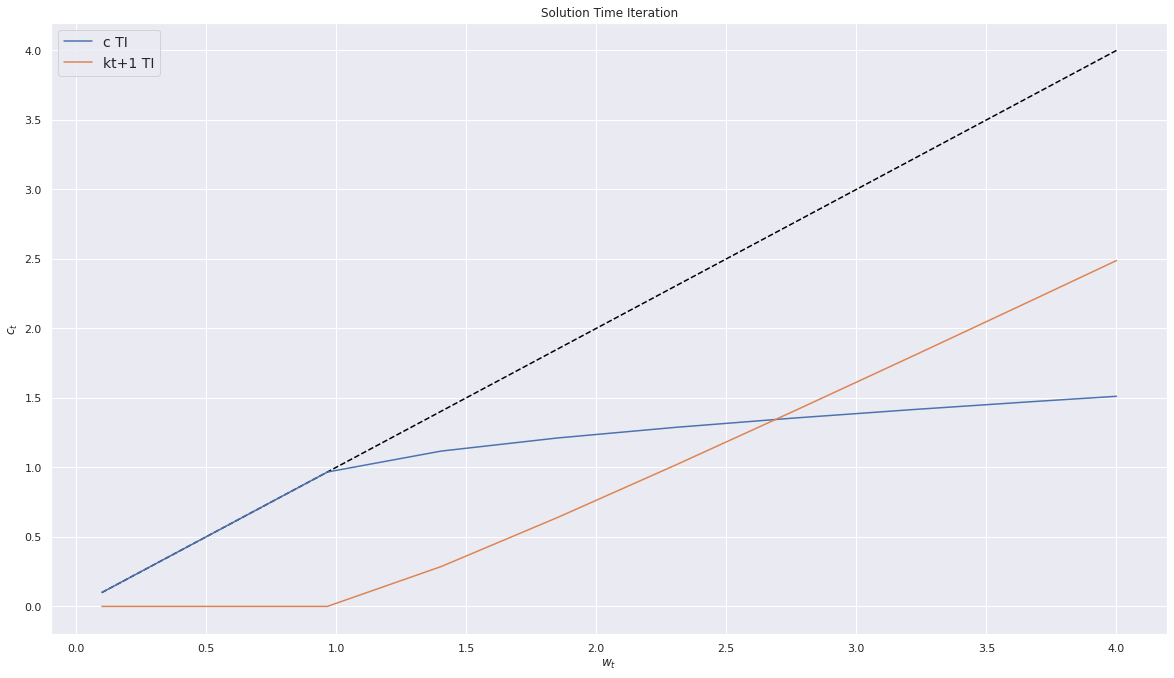

In [11]:
# Plot the result
len_wec = params.nb_points_test

with torch.no_grad():
    rvec = np.zeros(len_wec)
    pvec = np.zeros(len_wec)
    qvec = np.zeros(len_wec)
    δvec = np.zeros(len_wec)
    wvec = params.xvec_test
    state_next = np.column_stack((rvec, pvec, qvec, δvec, wvec))
    cvec_TI = params.c_function_TI(state_next) #σ_func(state_next)
    # Save for latter use
    cvec_TI_bc_0 = cvec_TI.copy()
    k_next_TI = wvec.squeeze(1) - cvec_TI

plt.plot(wvec, wvec, linestyle='--', color='black')
plt.plot(wvec, cvec_TI, label='c TI')
plt.plot(wvec, k_next_TI, label='kt+1 TI')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration")
plt.legend()

### Accuracy Time Iteration solution

Uses Monte Carlo Integration to approximate the expectation with respect to next period's shocks.

In [12]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_MC(10000, 100, params)

print("Euler TI")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis TI")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))


Euler TI
Mean: 0.00727893574151817
Median: 0.0026357808013518502
Min: 1.701172536172635e-11
Max: 0.11650500173156741
std dev.: 0.014096559512990037

Euler Bis TI
Mean: 0.003734397585799911
Median: 0.001318267734918832
Min: 8.505862680863174e-12
Max: 0.0638930024481732
std dev.: 0.007411702934618585


---


# II. BC-MC Operator


## II.A. Solve for a given M and N

Single training of the NN, for a given choice of M and N.


In [13]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    """
    Output share of cash-on-hand consumed, and lagrange multiplier
    """
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        y = self.linear_relu_stack(x)
        return y

model_MC = NeuralNetwork().to(device)
print(model_MC)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


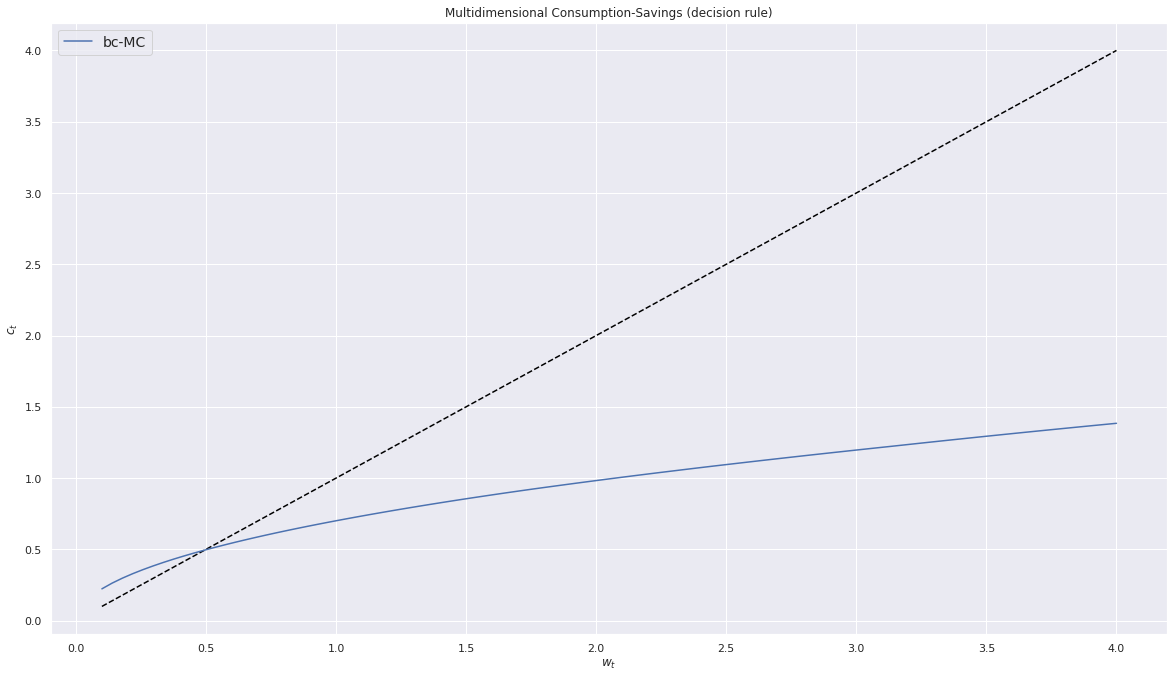

In [14]:
# Plot initial guess
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    pvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    qvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    cvec, hvec = model_normalized(model_MC, rvec_eval, pvec_eval, qvec_eval, δvec_eval, wvec_eval, params)

plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec.detach().numpy(), label="bc-MC")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

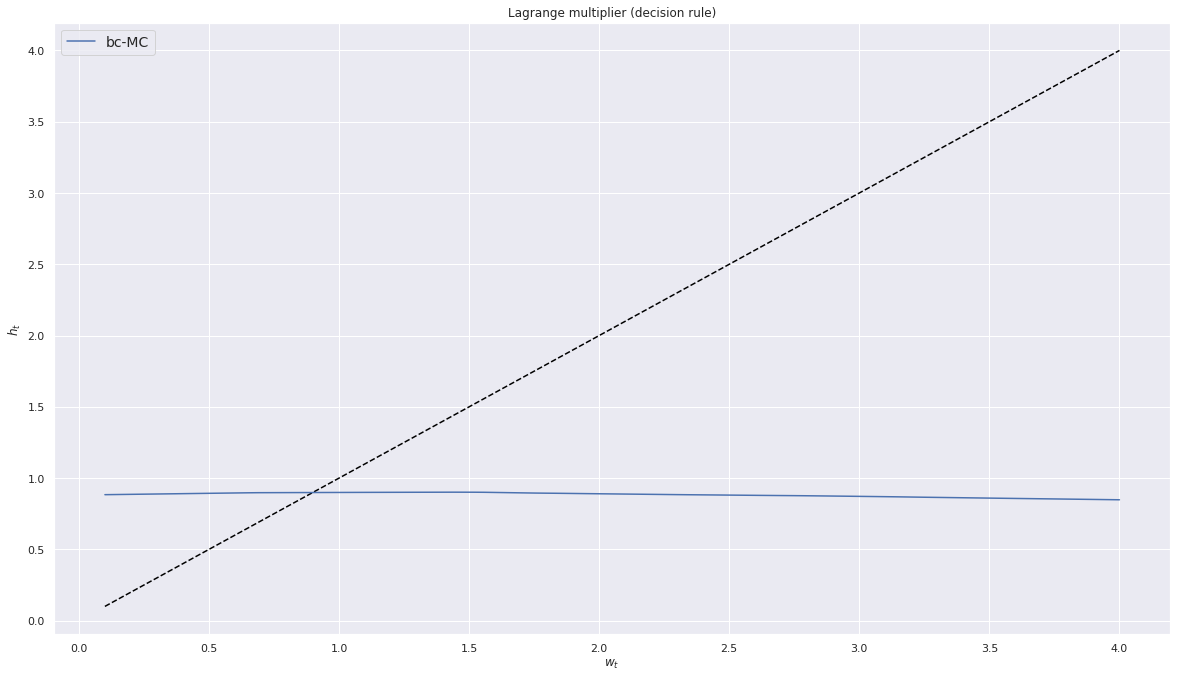

In [15]:
plt.title("Lagrange multiplier (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), hvec.detach().numpy(), label="bc-MC")
plt.xlabel("$w_t$")
plt.ylabel("$h_t$")
plt.legend()

In [16]:
# Check loss function for the untrained network
with torch.no_grad():
    v = Ξ_torch_MC(model_MC, params)
print(v)

tensor(0.0330)


In [17]:
np.random.seed(seed_number)
torch.manual_seed(seed_number)

model_MC.train()

if params.optimizer == "Adam":
    optimizer = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
elif params.optimizer == "SGD":
    optimizer = torch.optim.SGD(model_MC.parameters(), params.lr)
elif params.optimizer == "SWA":
    base_opt = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
    optimizer = SWA(base_opt, swa_start=params.swa_start, swa_freq=params.swa_freq, swa_lr=params.lr)
else:
    raise("optimizer unknown")

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params.freq_gamma)

loss_epochs_MC = torch.zeros(params.nb_epochs)
list_MC_gradient = [] #store the norm of the gradient
list_perc_abs_error_MC = [] #store median abs value percentage error
list_perc_abs_error_MC_mean = [] #mean
list_perc_abs_error_MC_max = [] #max
list_perc_abs_error_MC_std = [] #std
list_perc_abs_error_MC_i = [] #store index i
list_perc_abs_error_MC_loss = [] #store loss

for i in tqdm(range(0, params.nb_epochs)):
    loss = Ξ_torch_MC(model_MC, params)
    loss_epochs_MC[[i]] = float(loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0: #Monitor the gradient
        model_MC.eval()
        # Evaluate accuracy 
        with torch.no_grad():
            euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC_frozen(model_MC, params)
        list_perc_abs_error_MC.append(np.median(euler_bis))
        list_perc_abs_error_MC_mean.append(np.mean(euler_bis))
        list_perc_abs_error_MC_max.append(np.max(euler_bis))
        list_perc_abs_error_MC_std.append(np.std(euler_bis))
        list_perc_abs_error_MC_i.append(i)
        list_perc_abs_error_MC_loss.append(float(loss.item()))
        model_MC.train()
    if i % 1000 == 0:
        loss, current = float(loss.item()), i
        print(f"loss: {loss:>7f}, median euler error {list_perc_abs_error_MC[-1]:>7f}, [{current:>5d}/{params.nb_epochs:>5d}]")
    if (i % params.freq_scheduler == 0) & (i != 0) & (params.use_scheduler == True):
        scheduler.step()
        print("i : {}. Decreasing learning rate: {}".format(i, scheduler.get_last_lr()))

if params.optimizer == "SWA":
    optimizer.swap_swa_sgd()


  0%|                                         | 1/10000 [00:00<27:34,  6.04it/s]

loss: 0.053657, median euler error 0.039980, [    0/10000]


 10%|███▊                                 | 1020/10000 [00:07<01:08, 130.85it/s]

loss: 0.000763, median euler error 0.011707, [ 1000/10000]


 20%|███████▍                             | 2022/10000 [00:13<01:00, 132.72it/s]

loss: 0.000267, median euler error 0.005394, [ 2000/10000]


 30%|███████████▏                         | 3031/10000 [00:20<00:50, 137.09it/s]

loss: 0.000233, median euler error 0.004649, [ 3000/10000]


 40%|██████████████▉                      | 4033/10000 [00:27<00:38, 155.81it/s]

loss: 0.000137, median euler error 0.004067, [ 4000/10000]


 50%|██████████████████▌                  | 5025/10000 [00:34<00:43, 114.00it/s]

loss: 0.000181, median euler error 0.003408, [ 5000/10000]


 60%|██████████████████████▎              | 6031/10000 [00:41<00:26, 151.33it/s]

loss: 0.000157, median euler error 0.003724, [ 6000/10000]


 70%|██████████████████████████           | 7037/10000 [00:47<00:17, 164.89it/s]

loss: 0.000177, median euler error 0.002865, [ 7000/10000]


 80%|█████████████████████████████▋       | 8026/10000 [00:53<00:11, 173.47it/s]

loss: 0.000034, median euler error 0.002622, [ 8000/10000]


 90%|█████████████████████████████████▍   | 9036/10000 [01:00<00:06, 137.81it/s]

loss: 0.000130, median euler error 0.002119, [ 9000/10000]


100%|████████████████████████████████████| 10000/10000 [01:06<00:00, 149.81it/s]


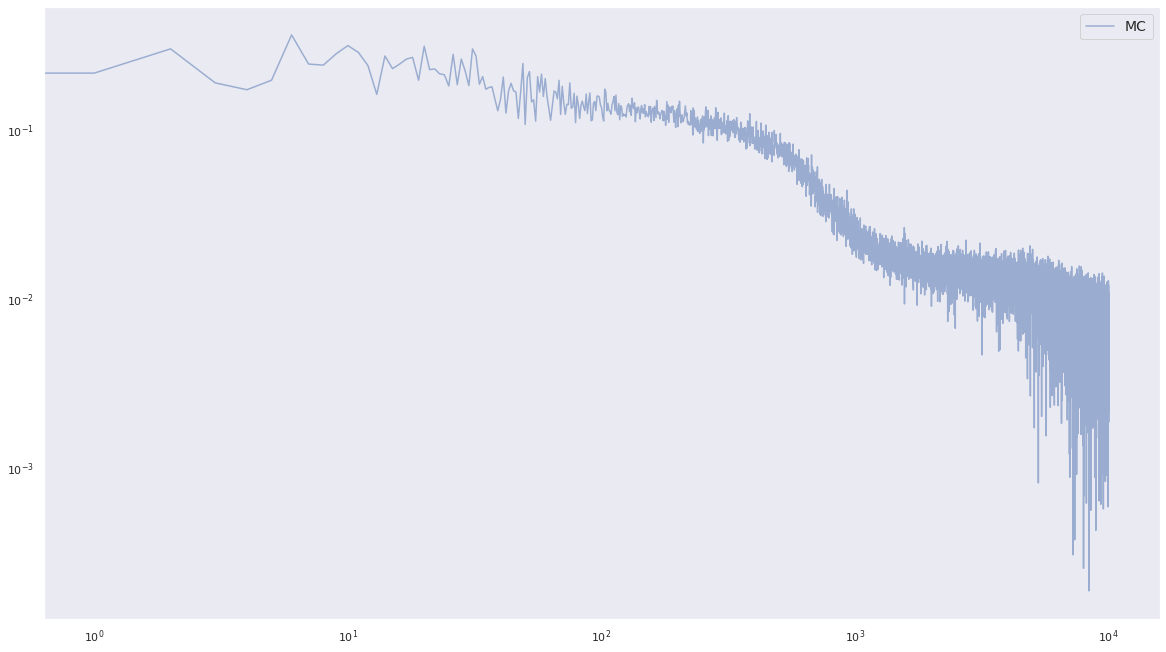

In [18]:
plt.plot(np.sqrt(np.abs(loss_epochs_MC)), label="MC", alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()

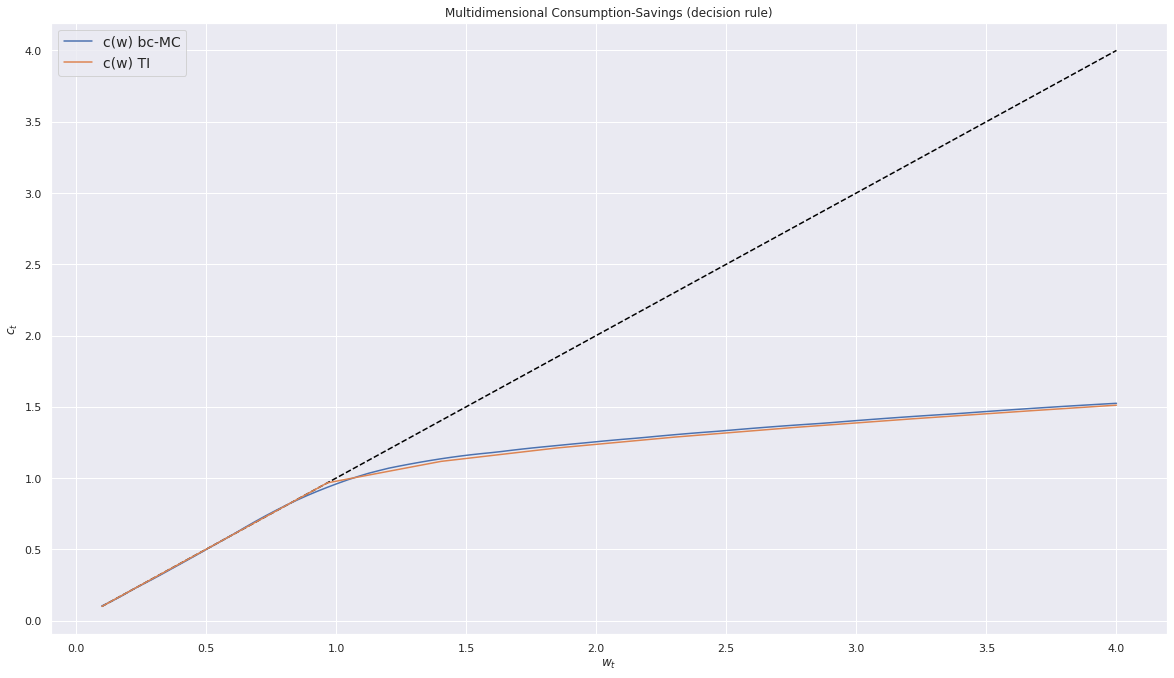

In [19]:
# Test approximation
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    pvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    qvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    cvec_MC, hvec_MC = model_normalized(model_MC, rvec_eval, pvec_eval, qvec_eval, δvec_eval, wvec_eval, params)
    # Save for latter use
    cvec_MC_bc_0, hvec_MC_bc_0 = cvec_MC.detach().numpy(), hvec_MC.detach().numpy()

plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="c(w) bc-MC")
plt.plot(wvec, cvec_TI, label='c(w) TI')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

### Accuracy

In [20]:
%%time 
model_MC.eval()

# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC(model_MC, 10000, 100, params)
#euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC_frozen(model_MC, params)

print("Euler MC")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("\nEuler Bis MC")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))


Euler MC
Mean: 0.009935733862221241
Median: 0.004189878702163696
Min: 0.0
Max: 0.14936017990112305
std dev.: 0.01646791212260723

Euler Bis MC
Mean: 0.00509668979793787
Median: 0.0020922422409057617
Min: 5.960464477539063e-08
Max: 0.0842442512512207
std dev.: 0.00872705690562725
CPU times: user 2.06 s, sys: 396 ms, total: 2.46 s
Wall time: 310 ms


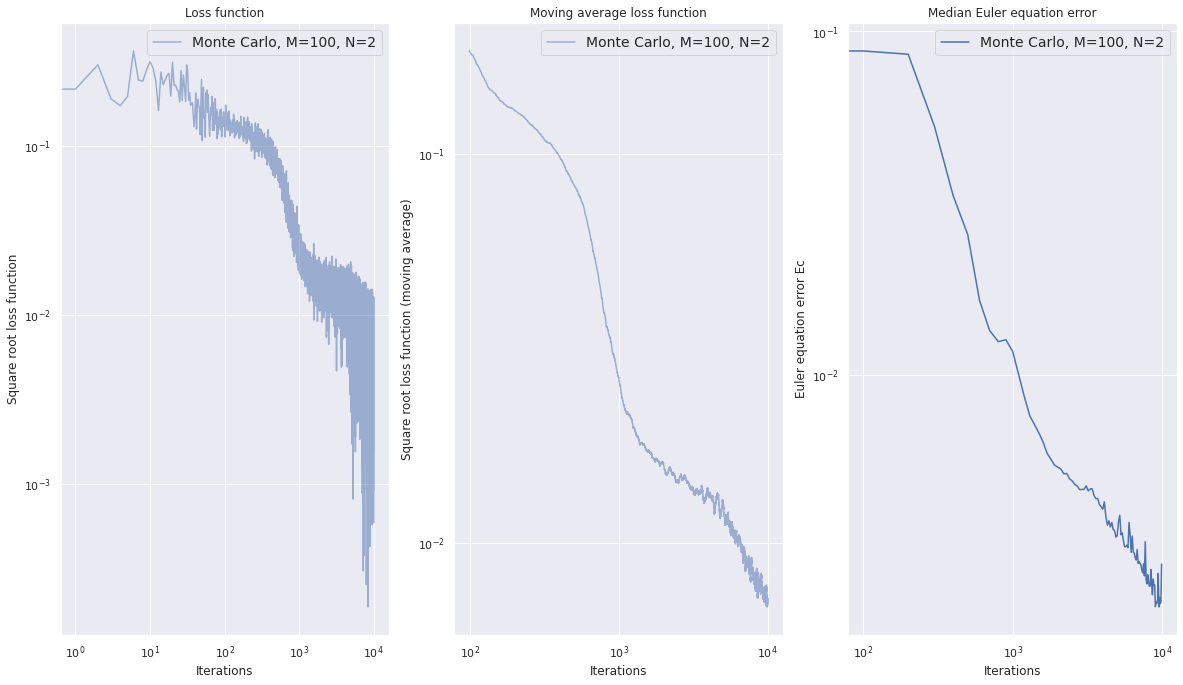

In [21]:
plot_scale = 1.25
rate=1
last_N_values = 2
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)


rate = 1
#fig.suptitle('Horizontally stacked subplots')
ax1.plot(pd.Series(np.sqrt( np.abs(loss_epochs_MC))).rolling(rate).mean(), label="Monte Carlo, M={}, N={}".format(params.M, params.N), alpha=0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('Square root loss function')
ax1.set_xlabel('Iterations')
ax1.set_title('Loss function')
ax1.legend()


rate = 100
#fig.suptitle('Horizontally stacked subplots')
ax2.plot(pd.Series(np.sqrt( np.abs(loss_epochs_MC))).rolling(rate).mean(), label="Monte Carlo, M={}, N={}".format(params.M, params.N), alpha=0.5)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylabel('Square root loss function (moving average)')
ax2.set_xlabel('Iterations')
ax2.set_title('Moving average loss function')
ax2.legend()

ax3.plot(list_perc_abs_error_MC_i, list_perc_abs_error_MC, label="Monte Carlo, M={}, N={}".format(params.M, params.N))
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel('Euler equation error Ec')
ax3.set_xlabel('Iterations')
ax3.set_title('Median Euler equation error')
ax3.legend()

#plt.suptitle("Loss function and absol".format(params.σ_e), fontsize=14)
figname = output_folder + 'summmary_MC_bc.png'
plt.savefig(figname)
plt.show()

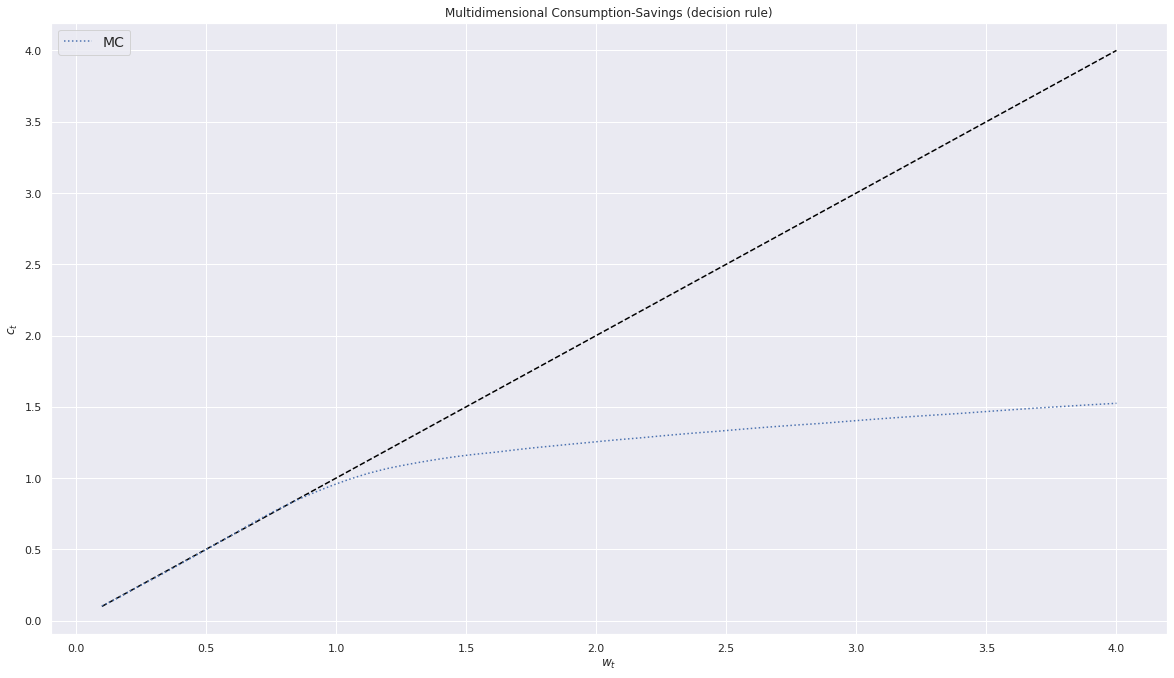

In [22]:
# Test approximation
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    #wvec_eval = torch.linspace(0.8, 1.2, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    pvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    qvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    cvec_MC, hvec_MC = model_normalized(model_MC, rvec_eval, pvec_eval, qvec_eval, δvec_eval, wvec_eval, params)


plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="MC", linestyle='dotted')
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

---
---

## III. bc-MC operator: find optimal M and N

### III.A. Binding constraint

Find optimal M and N. Several runs of SGD.

### Monte Carlo estimator: optimal choice of M and N



In [23]:
T = (params.M*params.N)/2 #Fix a total budget (number of times f is called when calculating the loss)

grid_N = np.array([N for N in range(2, params.T+2, 2)]) #Grid for N
grid_M = 2*T/grid_N #Grid for M

is_int = grid_M % 1 == 0
grid_N = grid_N[is_int]
grid_M = grid_M[is_int]

print(f"Grid for N: {grid_N}")
print(f"Grid for M: {grid_M}")
print(f"M*N: {grid_N*grid_M}") # sanity check

Grid for N: [  2   4   8  10  20  40  50 100]
Grid for M: [100.  50.  25.  20.  10.   5.   4.   2.]
M*N: [200. 200. 200. 200. 200. 200. 200. 200.]


#### Variance of the loss after x iterations

In [24]:
%%time
# params, nb_epoch_opt_M_N, nb_rep, nb_draws_loss, list_M, list_N
nb_iter_model = 0 #number iterations before calculating the gradient
nb_replications_model = 10 #number of replications of the procedure
nb_draws_var = 500 #number of draws used when calculating the variance
initial_model = NeuralNetwork().to(device)

df_variance_loss, df_variance_loss_median = calculate_variance_loss(params, nb_iter_model, 
                                                                    nb_replications_model, 
                                                                    nb_draws_var, 
                                                                    grid_M, grid_N, 
                                                                    norm_chosen = 2.0, 
                                                                    freq_accuracy=1000, 
                                                                    calculate_variance_gradient=True,
                                                                    initial_model=initial_model)

Norm chosen: 2.0
Rep 0 / 10. Training a model for 0 Iterations
Rep 0 / 10. Calculting variance loss for 500 Iterations
Rep 0 / 10. Calculting variance norm gradient for 500 Iterations
Rep 1 / 10. Training a model for 0 Iterations
Rep 1 / 10. Calculting variance loss for 500 Iterations
Rep 1 / 10. Calculting variance norm gradient for 500 Iterations
Rep 2 / 10. Training a model for 0 Iterations
Rep 2 / 10. Calculting variance loss for 500 Iterations
Rep 2 / 10. Calculting variance norm gradient for 500 Iterations
Rep 3 / 10. Training a model for 0 Iterations
Rep 3 / 10. Calculting variance loss for 500 Iterations
Rep 3 / 10. Calculting variance norm gradient for 500 Iterations
Rep 4 / 10. Training a model for 0 Iterations
Rep 4 / 10. Calculting variance loss for 500 Iterations
Rep 4 / 10. Calculting variance norm gradient for 500 Iterations
Rep 5 / 10. Training a model for 0 Iterations
Rep 5 / 10. Calculting variance loss for 500 Iterations
Rep 5 / 10. Calculting variance norm gradient 

/tmp/ipykernel_7619/2801691797.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
/tmp/ipykernel_7619/2801691797.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])
/tmp/ipykernel_7619/2801691797.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_M_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['M'])
/tmp/ipykernel_7619/2801691797.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0

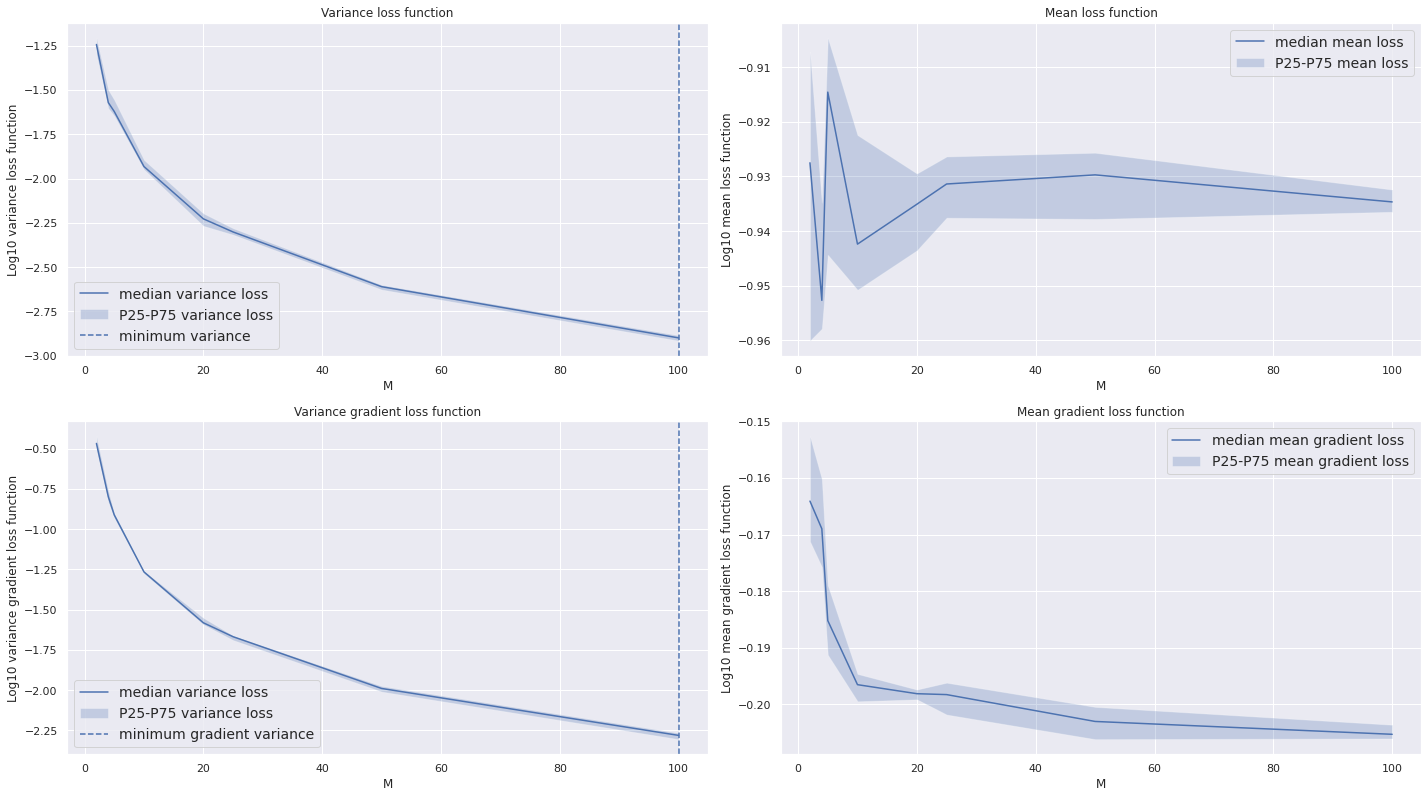

In [25]:
min_var = np.min(df_variance_loss_median['P50_var_loss'])
min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])

try:
    min_var_grad = np.min(df_variance_loss_median['P50_var_gradient_loss'])
    min_M_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['M'])
    min_N_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['N'])
except:
    print("error")
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_var_loss']), label="median variance loss")
ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline(min_M, label="minimum variance", linestyle="--")
ax1.set_xlabel("M")
ax1.set_ylabel("Log10 variance loss function")
ax1.set_title('Variance loss function')
ax1.legend()

ax2.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_mean_loss']), label="median mean loss")
ax2.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_mean_loss']), np.log10(df_variance_loss_median['P75_mean_loss']), label="P25-P75 mean loss", alpha=0.25)
ax2.set_xlabel("M")
ax2.set_ylabel("Log10 mean loss function")
ax2.set_title('Mean loss function')
ax2.legend()

ax3.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_var_gradient_loss']), label="median variance loss")
ax3.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_gradient_loss']), np.log10(df_variance_loss_median['P75_var_gradient_loss']), label="P25-P75 variance loss", alpha=0.25)
ax3.axvline(min_M_grad, label="minimum gradient variance", linestyle="--")
ax3.set_xlabel("M")
ax3.set_ylabel("Log10 variance gradient loss function")
ax3.set_title('Variance gradient loss function')
ax3.legend()

ax4.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_mean_gradient_loss']), label="median mean gradient loss")
ax4.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_mean_gradient_loss']), np.log10(df_variance_loss_median['P75_mean_gradient_loss']), label="P25-P75 mean gradient loss", alpha=0.25)
ax4.set_xlabel("M")
ax4.set_ylabel("Log10 mean gradient loss function")
ax4.set_title('Mean gradient loss function')
ax4.legend()

fig.tight_layout()
figname = output_folder + 'variance_loss_bc_' + str(params.bc) + '.png'
plt.savefig(figname)
plt.show()


In [26]:
print("Minimizing the loss function")
print("variance loss")
print("Minimum error for M: {}.".format(min_M))
print("Minimum error for N: {}.".format(min_N))

print("variance gradient loss")
print("Minimum error for M: {}.".format(min_M_grad))
print("Minimum error for N: {}.".format(min_N_grad))

Minimizing the loss function
variance loss
Minimum error for M: 100.
Minimum error for N: 2.
variance gradient loss
Minimum error for M: 100.
Minimum error for N: 2.


/tmp/ipykernel_7619/2867632988.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
/tmp/ipykernel_7619/2867632988.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])


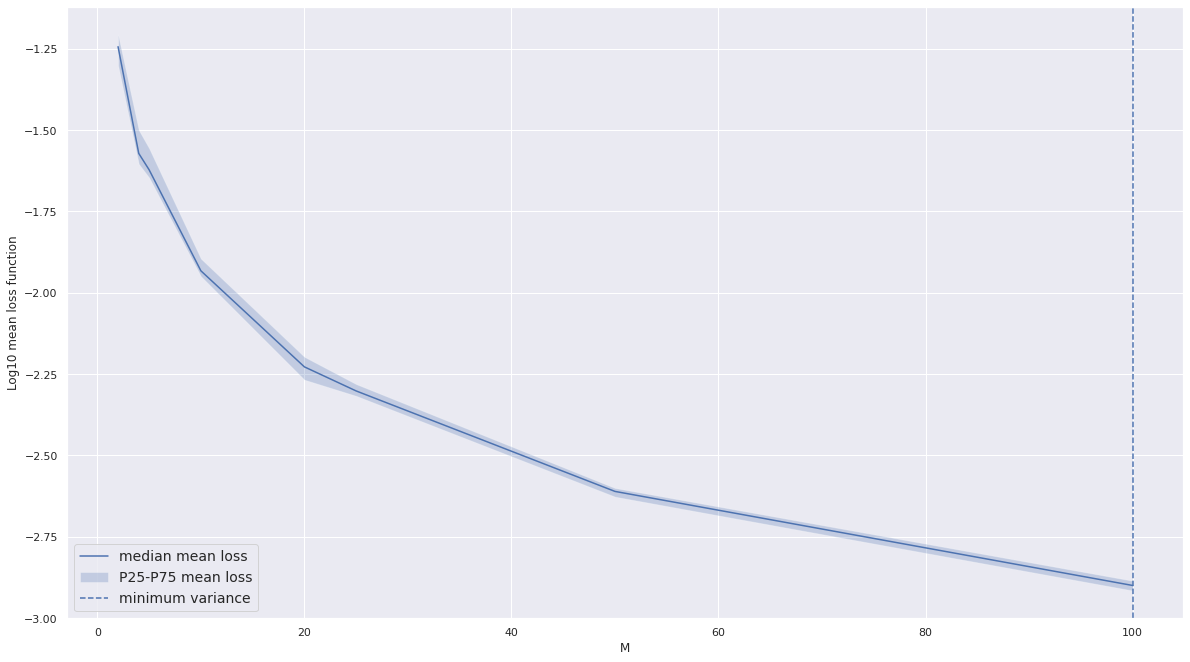

In [27]:
min_var = np.min(df_variance_loss_median['P50_var_loss'])
min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])

plt.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_var_loss']), label="median mean loss")
plt.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 mean loss", alpha=0.25)
plt.axvline(min_M, label="minimum variance", linestyle="--")
plt.xlabel("M")
plt.ylabel("Log10 mean loss function")
plt.legend()


In [28]:
df_variance_loss_median['optimizer'] = params.optimizer
df_variance_loss_median['sigma_e'] = params.σ_e
df_variance_loss_median['Sobol'] = params.use_Sobol
df_variance_loss_median['user_scheduler'] = params.use_scheduler
df_variance_loss_median['lr'] = params.lr

# Extra transformations
df_variance_loss_median['log10_variance_loss'] = np.log10(df_variance_loss_median['P50_var_loss'])
df_variance_loss_median['log10_variance_gradient_loss'] = np.log10(df_variance_loss_median['P50_var_gradient_loss'])
df_variance_loss_median['log_std_loss'] = np.log(df_variance_loss_median['P50_std_loss'])
df_variance_loss_median['log_std_gradient_loss'] = np.log(df_variance_loss_median['P50_std_gradient_loss'])

df_variance_loss_median.to_csv(output_folder + 'df_variance_loss_median_bc_' + str(params.bc) + '.csv', index=False)

df_variance_loss_median

,M,N,var_loss,std_loss,mean_loss,var_gradient_loss,std_gradient_loss,mean_gradient_loss,nb_rep,min_var_loss,...,P90_mean_gradient_loss,optimizer,sigma_e,Sobol,user_scheduler,lr,log10_variance_loss,log10_variance_gradient_loss,log_std_loss,log_std_gradient_loss
0,2.0,100.0,0.057103,0.238946,0.118166,0.340787,0.583770,0.685331,4.5,0.045162,...,0.711093,Adam,0.5,False,False,0.001,-1.243343,-0.467516,-1.431518,-0.538248
1,4.0,50.0,0.026824,0.163777,0.111511,0.158931,0.398534,0.677656,4.5,0.023893,...,0.696839,Adam,0.5,False,False,0.001,-1.571473,-0.798792,-1.809250,-0.919963
2,5.0,40.0,0.023892,0.154564,0.121737,0.122553,0.350075,0.652825,4.5,0.020208,...,0.673745,Adam,0.5,False,False,0.001,-1.621747,-0.911677,-1.867147,-1.049609
3,10.0,20.0,0.011687,0.108100,0.114185,0.054281,0.232982,0.636037,4.5,0.009635,...,0.643873,Adam,0.5,False,False,0.001,-1.932292,-1.265355,-2.224694,-1.456794
4,20.0,10.0,0.005920,0.076936,0.116121,0.026220,0.161920,0.633706,4.5,0.005119,...,0.639901,Adam,0.5,False,False,0.001,-2.227668,-1.581361,-2.564781,-1.820650
5,25.0,8.0,0.004992,0.070657,0.117115,0.021487,0.146586,0.633474,4.5,0.004445,...,0.637755,Adam,0.5,False,False,0.001,-2.301682,-1.667817,-2.649921,-1.920145
6,50.0,4.0,0.002452,0.049515,0.117566,0.010253,0.101253,0.626593,4.5,0.002163,...,0.632413,Adam,0.5,False,False,0.001,-2.610533,-1.989145,-3.005487,-2.290128
7,100.0,2.0,0.001260,0.035494,0.116233,0.005241,0.072392,0.623329,4.5,0.001154,...,0.626513,Adam,0.5,False,False,0.001,-2.899678,-2.280619,-3.338379,-2.625660


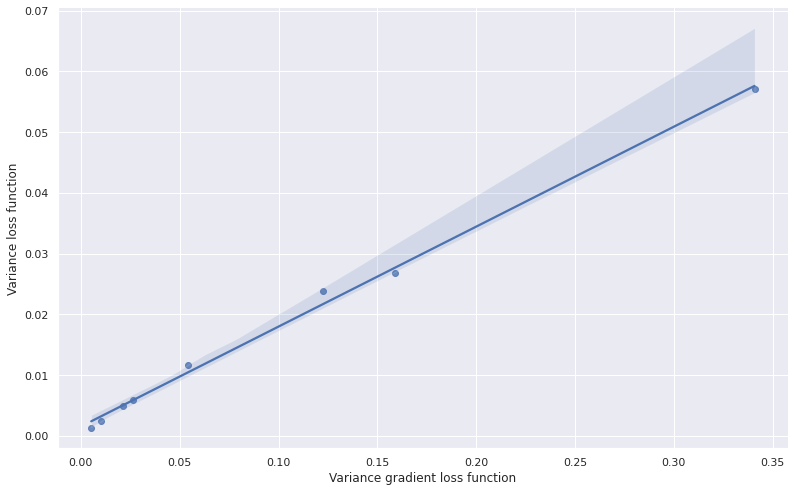

In [29]:
ax = sns.lmplot(x='var_gradient_loss', y='var_loss', data=df_variance_loss_median, height=7, aspect=1.6)
ax.set(xlabel='Variance gradient loss function', ylabel='Variance loss function')
fig.tight_layout()
figname = output_folder + 'variance_loss_&_variance_gradient_loss_bc' + str(params.bc) + '.png'
plt.savefig(figname)
plt.show()

In [33]:
model = smf.ols(formula='var_gradient_loss ~ var_loss', data=df_variance_loss).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      var_gradient_loss   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     964.3
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.15e-45
Time:                        16:29:28   Log-Likelihood:                 167.44
No. Observations:                  80   AIC:                            -330.9
Df Residuals:                      78   BIC:                            -326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0044      0.005     -0.962      0.3

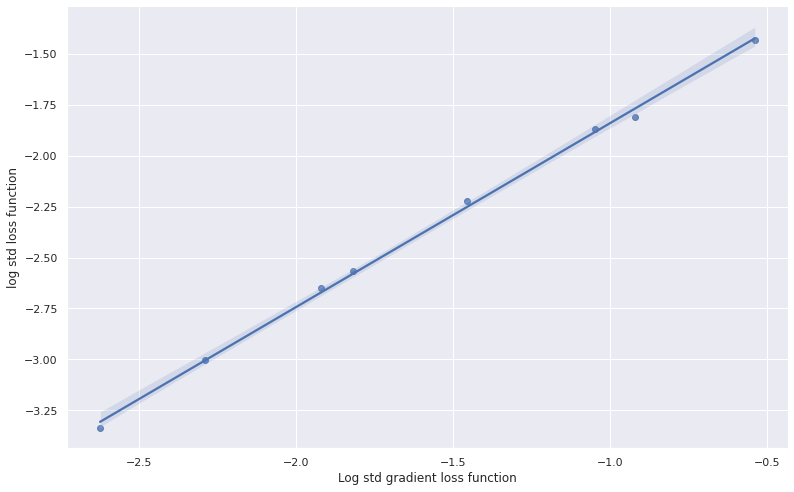

In [34]:
ax = sns.lmplot(x='log_std_gradient_loss', y='log_std_loss', data=df_variance_loss_median, height=7, aspect=1.6)
ax.set(xlabel='Log std gradient loss function', ylabel='log std loss function')
fig.tight_layout()
figname = output_folder + 'std_loss_&_std_gradient_loss_bc' + str(params.bc) + '.png'
plt.savefig(figname)
plt.show()


In [35]:
model = smf.ols(formula='log_std_loss ~ log_std_gradient_loss', data=df_variance_loss_median).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           log_std_loss   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3890.
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.14e-09
Time:                        16:29:28   Log-Likelihood:                 18.574
No. Observations:                   8   AIC:                            -33.15
Df Residuals:                       6   BIC:                            -32.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.93

/home/julien/.local/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


---
---

### Several runs for the same choice of M and N

#### A. Run for All in One: N=2

In [36]:
M_chosen = 100 #25 #100 #200 # 50 #outer expectation 
N_chosen = 2 #8 #2 #4 # Inner expectation
nb_epochs_chosen = 10000 #number of epochs

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                  w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 0.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.5
w2: 0.5


In [37]:
%%time
# Calculate variance of loss. Used in the plot below
nb_iter_model = 2000 #200 #1 # nb iterations before calculating the variance
nb_rep_model = 10 #number of repetitions of the process: iter model -> calculate variance of loss
nb_draws_var = 500 #number of independent draws to calculate the variance

initial_model = NeuralNetwork().to(device)

# Grid M and grid N
T = (params.M*params.N)/2
grid_N = np.array([N for N in range(2, params.T+2, 2)])
grid_M = 2*T/grid_N

is_int = grid_M % 1 == 0
grid_N = grid_N[is_int]
grid_M = grid_M[is_int]

print(grid_N)
print(grid_M)
print(grid_N*grid_M)

df_variance_loss, df_variance_loss_median = calculate_variance_loss(params, nb_iter_model, 
                                                                    nb_rep_model, nb_draws_var, 
                                                                    grid_M, grid_N, 
                                                                    norm_chosen = 2.0, freq_accuracy=1000, 
                                                                    calculate_variance_gradient=True,
                                                                    initial_model=initial_model)
df_variance_loss_bc_zero = df_variance_loss.copy()
df_variance_loss_median_bc_zero = df_variance_loss_median.copy()

[  2   4   8  10  20  40  50 100]
[100.  50.  25.  20.  10.   5.   4.   2.]
[200. 200. 200. 200. 200. 200. 200. 200.]
Norm chosen: 2.0
Rep 0 / 10. Training a model for 2000 Iterations
loss: 0.268436, median percentage euler error 0.047579, [    0/ 2000]
loss: 0.000755, median percentage euler error 0.012455, [ 1000/ 2000]
Rep 0 / 10. Calculting variance loss for 500 Iterations
Rep 0 / 10. Calculting variance norm gradient for 500 Iterations
Rep 1 / 10. Training a model for 2000 Iterations
loss: 0.228567, median percentage euler error 0.047593, [    0/ 2000]
loss: 0.000887, median percentage euler error 0.010863, [ 1000/ 2000]
Rep 1 / 10. Calculting variance loss for 500 Iterations
Rep 1 / 10. Calculting variance norm gradient for 500 Iterations
Rep 2 / 10. Training a model for 2000 Iterations
loss: 0.165075, median percentage euler error 0.047641, [    0/ 2000]
loss: 0.001352, median percentage euler error 0.011703, [ 1000/ 2000]
Rep 2 / 10. Calculting variance loss for 500 Iterations


In [38]:
%%time
nb_rep = 10 #number of different trainings, holding the initial values cst
freq_loss_chosen = 100 #20 #monitor accuracy every 10 iterations of gradient step (the smaller, the more time it takes)
# Calculate several runs, with similar initial guess
use_same_draws_chosen = True
M_accuracy_chosen = 1000
N_accuracy_chosen = 100

df_AIO, df_AIO_average = calculate_several_runs(params, nb_rep, 
                                                freq_loss = freq_loss_chosen,
                                                initial_model=initial_model,
                                                use_same_draws = use_same_draws_chosen, 
                                                M_accuracy = M_accuracy_chosen, 
                                                N_accuracy = N_accuracy_chosen)

df_AIO_bc_zero = df_AIO.copy()
df_AIO_average_bc_zero = df_AIO_average.copy()

Training model : 0 / 10
loss: 0.182751 [    0/10000]
loss: 0.000980 [ 1000/10000]
loss: 0.000303 [ 2000/10000]
loss: 0.000255 [ 3000/10000]
loss: 0.000179 [ 4000/10000]
loss: 0.000215 [ 5000/10000]
loss: 0.000181 [ 6000/10000]
loss: 0.000086 [ 7000/10000]
loss: -0.000031 [ 8000/10000]
loss: 0.000076 [ 9000/10000]
Training model : 1 / 10
loss: 0.221888 [    0/10000]
loss: 0.000844 [ 1000/10000]
loss: 0.000440 [ 2000/10000]
loss: 0.000345 [ 3000/10000]
loss: 0.000196 [ 4000/10000]
loss: 0.000082 [ 5000/10000]
loss: 0.000132 [ 6000/10000]
loss: 0.000059 [ 7000/10000]
loss: 0.000042 [ 8000/10000]
loss: 0.000105 [ 9000/10000]
Training model : 2 / 10
loss: 0.220442 [    0/10000]
loss: 0.000811 [ 1000/10000]
loss: 0.000298 [ 2000/10000]
loss: 0.000300 [ 3000/10000]
loss: 0.000136 [ 4000/10000]
loss: 0.000341 [ 5000/10000]
loss: 0.000082 [ 6000/10000]
loss: 0.000099 [ 7000/10000]
loss: 0.000017 [ 8000/10000]
loss: -0.000018 [ 9000/10000]
Training model : 3 / 10
loss: 0.206915 [    0/10000]
los

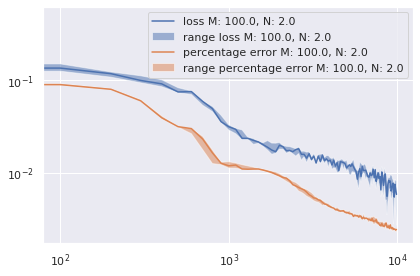

In [39]:
fig, ax = plt.subplots()
ax.plot(df_AIO_average['iter'], df_AIO_average['P50_loss'], label="loss M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]))
ax.fill_between(df_AIO_average['iter'],  df_AIO_average['P25_loss'], df_AIO_average['P75_loss'], label="range loss M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]), alpha=0.5)

ax.plot(df_AIO_average['iter'], df_AIO_average['P50_med_percentage_error'], label="percentage error M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]))
ax.fill_between(df_AIO_average['iter'],  df_AIO_average['P25_med_percentage_error'], df_AIO_average['P75_med_percentage_error'], label="range percentage error M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]), alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()
fig.tight_layout()

#### B. Run for other choice of M and N

In [40]:
M_chosen = 2 ## Outer expectation 
N_chosen = 100 ## Inner expectation

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                  w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([2, 200])
W_expanded.shape: torch.Size([200, 200])
M: 2
N: 100
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 0.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.5
w2: 0.5


In [41]:
%%time
df_MC, df_MC_average = calculate_several_runs(params, nb_rep, 
                                                freq_loss = freq_loss_chosen,
                                                initial_model=initial_model,
                                                use_same_draws = use_same_draws_chosen, 
                                                M_accuracy = M_accuracy_chosen, 
                                                N_accuracy = N_accuracy_chosen)

# Create copies
df_MC_bc_zero = df_MC.copy()
df_MC_average_bc_zero = df_MC_average.copy() 

Training model : 0 / 10
loss: 0.150125 [    0/10000]
loss: 0.005474 [ 1000/10000]
loss: 0.000245 [ 2000/10000]
loss: 0.015324 [ 3000/10000]
loss: 0.000390 [ 4000/10000]
loss: 0.000331 [ 5000/10000]
loss: 0.000020 [ 6000/10000]
loss: 0.000969 [ 7000/10000]
loss: 0.000051 [ 8000/10000]
loss: 0.000134 [ 9000/10000]
Training model : 1 / 10
loss: 0.108692 [    0/10000]
loss: 0.009736 [ 1000/10000]
loss: 0.000376 [ 2000/10000]
loss: 0.003539 [ 3000/10000]
loss: 0.000063 [ 4000/10000]
loss: 0.000022 [ 5000/10000]
loss: 0.000439 [ 6000/10000]
loss: 0.000029 [ 7000/10000]
loss: 0.000185 [ 8000/10000]
loss: 0.000028 [ 9000/10000]
Training model : 2 / 10
loss: 0.219725 [    0/10000]
loss: 0.016375 [ 1000/10000]
loss: 0.011818 [ 2000/10000]
loss: 0.000107 [ 3000/10000]
loss: 0.000043 [ 4000/10000]
loss: 0.000658 [ 5000/10000]
loss: 0.000129 [ 6000/10000]
loss: 0.000057 [ 7000/10000]
loss: 0.000139 [ 8000/10000]
loss: 0.000811 [ 9000/10000]
Training model : 3 / 10
loss: 0.267738 [    0/10000]
loss:

In [43]:
if save_to_csv == True:
    print("Saving to CSV")
    df_MC_bc_zero.to_csv(output_folder + 'df_MC_bc' + str(params.bc) + '.csv', index=False)
    df_MC_average_bc_zero.to_csv(output_folder + 'df_MC_average_bc' + str(params.bc) + '.csv', index=False)
    df_AIO_bc_zero.to_csv(output_folder + 'df_AIO_bc' + str(params.bc) + '.csv', index=False)
    df_AIO_average_bc_zero.to_csv(output_folder + 'df_AIO_average_bc' + str(params.bc) + '.csv', index=False)
    df_variance_loss_bc_zero.to_csv(output_folder + 'df_variance_loss_bc' + str(params.bc) + '.csv', index=False)
    df_variance_loss_median_bc_zero.to_csv(output_folder + 'df_variance_loss_median_bc' + str(params.bc) + '.csv', index=False)

if read_from_csv == True:
    print("Reading from CSV")
    # Read from .csv
    df_MC = pd.read_csv(output_folder + 'df_MC_bc' + str(params.bc) + '.csv')
    df_MC_average = pd.read_csv(output_folder + 'df_MC_average_bc' + str(params.bc) + '.csv')
    df_AIO = pd.read_csv(output_folder + 'df_AIO_bc' + str(params.bc) + '.csv')
    df_AIO_average = pd.read_csv(output_folder + 'df_AIO_average_bc' + str(params.bc) + '.csv')
    df_variance_loss = pd.read_csv(output_folder + 'df_variance_loss_bc' + str(params.bc) + '.csv')
    df_variance_loss_median = pd.read_csv(output_folder + 'df_variance_loss_median_bc' + str(params.bc) + '.csv')
    

Saving to CSV


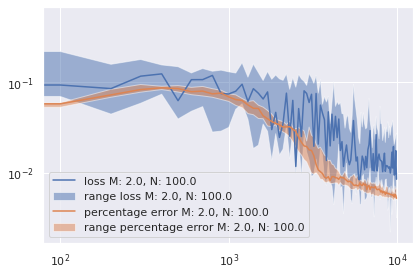

In [44]:
fig, ax = plt.subplots()
ax.plot(df_MC_average['iter'], df_MC_average['P50_loss'], label="loss M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]))
ax.fill_between(df_MC_average['iter'],  df_MC_average['P10_loss'], df_MC_average['P90_loss'], label="range loss M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]), alpha=0.5)

ax.plot(df_MC_average['iter'], df_MC_average['P50_med_percentage_error'], label="percentage error M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]))
ax.fill_between(df_MC_average['iter'],  df_MC_average['P10_med_percentage_error'], df_MC_average['P90_med_percentage_error'], label="range percentage error M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]), alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()
fig.tight_layout()

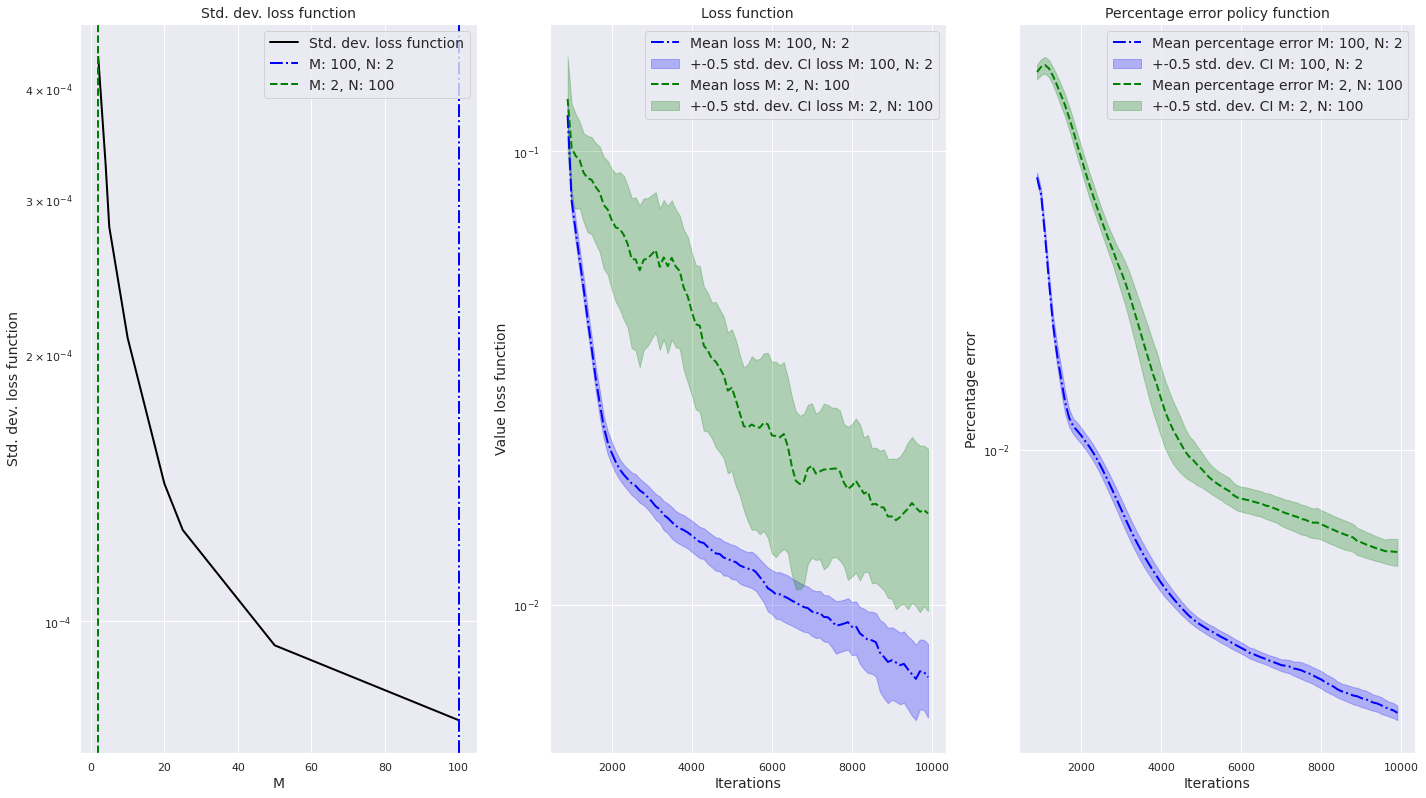

In [45]:
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE

# Use one standard deviation band
rate_P50 = 10 #rate for the average
rate_rolling_stddev = 10 #rate for the stddev.
rate = 10 #rate for the std. bounds
mult_std = 0.5
min_val = 1e-12

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Loss AIO
linestyle_AIO = "-."
linestyle_MC = "--"
color_AIO = "blue"
color_MC = "green"

M_AIO = int(df_AIO_average['M'].values[0])
N_AIO = int(df_AIO_average['N'].values[0])

M_MC = int(df_MC_average['M'].values[0])
N_MC = int(df_MC_average['N'].values[0])

# Std. dev. loss
ax1.plot(df_variance_loss_median['M'], df_variance_loss_median['P50_std_loss'], label="Std. dev. loss function", color="black", linewidth=linewidth_chosen)
#ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline([params.T], label="M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax1.axvline([2], label="M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax1.set_xlabel("M",size=MEDIUM_SIZE)
ax1.set_ylabel("Std. dev. loss function",size=MEDIUM_SIZE)
ax1.set_title('Std. dev. loss function',size=MEDIUM_SIZE)
ax1.legend(loc='upper right')

# Loss AIO
std_series = df_AIO_average['std_loss']
ax2.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax2.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Loss Monte Carlo
std_series = df_MC_average['std_loss']
ax2.plot(df_MC_average['iter'], pd.Series(df_MC_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax2.fill_between(df_MC_average['iter'],  pd.Series(np.maximum(df_MC_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)
ax2.set_title('Loss function',size=MEDIUM_SIZE)
ax2.set_xlabel("Iterations",size=MEDIUM_SIZE)
ax2.set_ylabel("Value loss function",size=MEDIUM_SIZE)
ax2.legend()

# Error AIO
#rate_P50 = 10
#rate = 10
mult_std = 0.5
#min_val = 1e-12

std_series = df_AIO_average['std_med_percentage_error']
ax3.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax3.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Error MC
std_series = df_MC_average['std_med_percentage_error']
ax3.plot(df_MC_average['iter'], pd.Series(df_MC_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax3.fill_between(df_MC_average['iter'], pd.Series(np.maximum(df_MC_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)

ax3.set_xlabel("Iterations",size=MEDIUM_SIZE)
ax3.set_ylabel("Percentage error",size=MEDIUM_SIZE)
ax3.set_title('Percentage error policy function',size=MEDIUM_SIZE)
ax3.legend()

ax1.set_yscale('log')
#ax1_bis.set_xscale('log')
#ax2.set_xscale('log')
ax2.set_yscale('log')
#ax3.set_xscale('log')
ax3.set_yscale('log')


fig.tight_layout()

figname = output_folder + 'AIO_versus_MC_several_runs_2_bc' + str(params.bc) + '.png'
plt.savefig(figname, dpi=dpi_chosen)
plt.show()

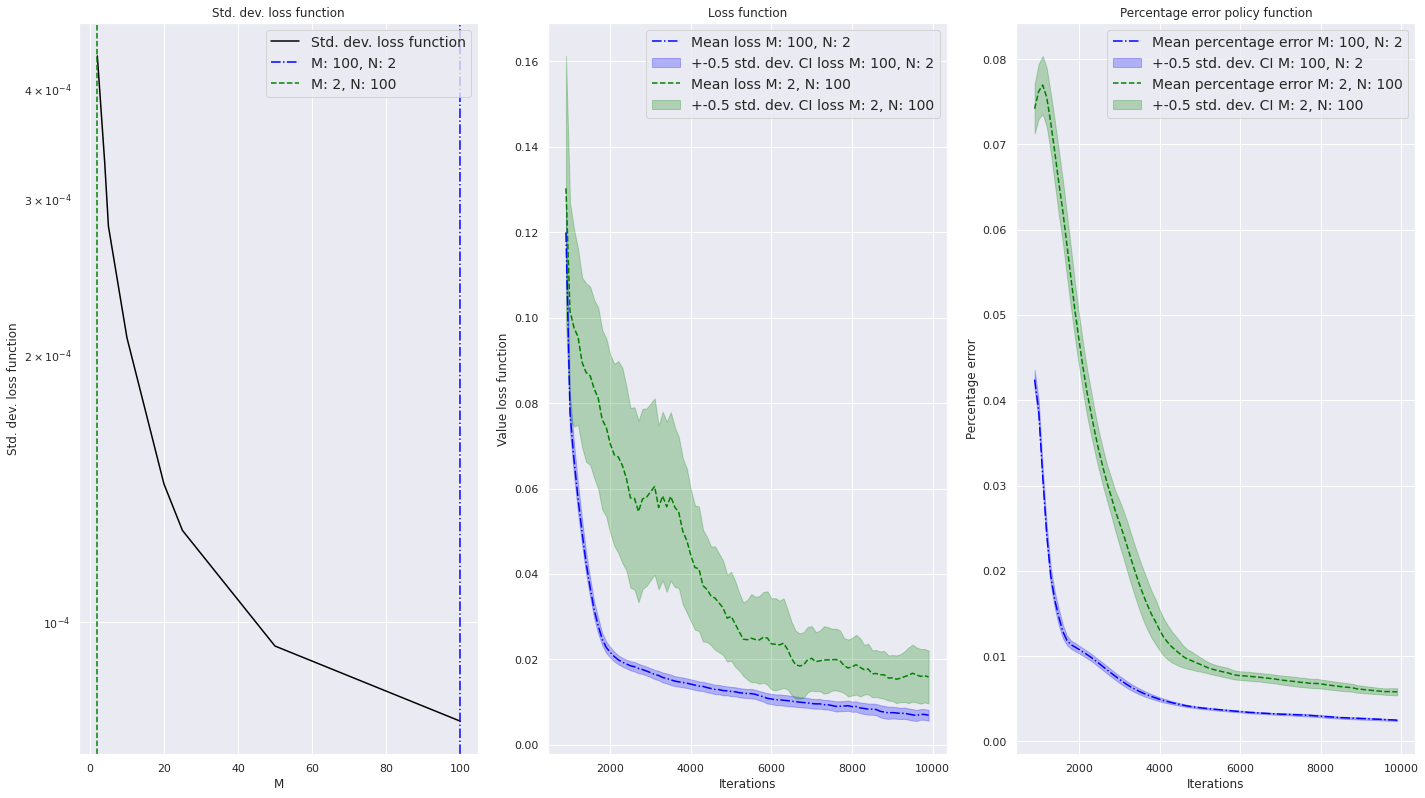

In [46]:
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)

# Use one standard deviation band
rate_P50 = 10 #rate for the average
rate_rolling_stddev = 10 #rate for the stddev.
rate = 10 #rate for the std. bounds
mult_std = 0.5
min_val = 1e-12

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Loss AIO
linestyle_AIO = "-."
linestyle_MC = "--"
color_AIO = "blue"
color_MC = "green"

M_AIO = int(df_AIO_average['M'].values[0])
N_AIO = int(df_AIO_average['N'].values[0])

M_MC = int(df_MC_average['M'].values[0])
N_MC = int(df_MC_average['N'].values[0])

# Std. dev. loss
ax1.plot(df_variance_loss_median['M'], df_variance_loss_median['P50_std_loss'], label="Std. dev. loss function", color="black")
#ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline([params.T], label="M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax1.axvline([2], label="M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax1.set_xlabel("M")
ax1.set_ylabel("Std. dev. loss function")
ax1.set_title('Std. dev. loss function')
ax1.legend(loc='upper right')

# Loss AIO
std_series = df_AIO_average['std_loss']
ax2.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax2.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Loss Monte Carlo
std_series = df_MC_average['std_loss']
ax2.plot(df_MC_average['iter'], pd.Series(df_MC_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax2.fill_between(df_MC_average['iter'],  pd.Series(np.maximum(df_MC_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)
ax2.set_title('Loss function')
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Value loss function")
ax2.legend()

# Error AIO
mult_std = 0.5

std_series = df_AIO_average['std_med_percentage_error']
ax3.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax3.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Error MC
std_series = df_MC_average['std_med_percentage_error']
ax3.plot(df_MC_average['iter'], pd.Series(df_MC_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax3.fill_between(df_MC_average['iter'], pd.Series(np.maximum(df_MC_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)

ax3.set_xlabel("Iterations")
ax3.set_ylabel("Percentage error")
ax3.set_title('Percentage error policy function')
ax3.legend()

ax1.set_yscale('log')
#ax1_bis.set_xscale('log')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#ax3.set_xscale('log')
#ax3.set_yscale('log')


fig.tight_layout()

figname = output_folder + 'AIO_versus_MC_several_runs_2_bc' + str(params.bc) + '_linear_scale.png'
plt.savefig(figname)
plt.show()

In [47]:
# Compare levels of losses and accuracy
rate_P50 = 10
rate = 10
mult_std = 1.0
min_val = 1e-12
last_loss_AIO = pd.Series(df_AIO_average['loss']).rolling(rate).mean().values[-1]
last_loss_MC = pd.Series(df_MC_average['loss']).rolling(rate).mean().values[-1]

print("-------------------------")
print("Comparing levels")
print("Final loss AIO: {}".format(last_loss_AIO))
print("Final loss MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

last_loss_AIO = pd.Series(df_AIO_average['med_percentage_error']).rolling(rate).mean().values[-1]
last_loss_MC = pd.Series(df_MC_average['med_percentage_error']).rolling(rate).mean().values[-1]

print("Median % error AIO: {}".format(last_loss_AIO))
print("Median % error MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

print("-------------------------")
print("Comparing std deviations")
last_loss_AIO = df_AIO_average['std_loss'].values[-1]
last_loss_MC = df_MC_average['std_loss'].values[-1]

print("Final std dev. loss AIO: {}".format(last_loss_AIO))
print("Final std dev.  loss MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

last_loss_AIO = df_AIO_average['med_percentage_error'].values[-1]
last_loss_MC = df_MC_average['med_percentage_error'].values[-1]

print("Final std dev. euler error AIO: {}".format(last_loss_AIO))
print("Final std dev. euler error MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

-------------------------
Comparing levels
Final loss AIO: 0.006922978099729464
Final loss MC: 0.015890308079874717
% difference: -56.43270058119574
Median % error AIO: 0.002475799201056361
Median % error MC: 0.005811164854094386
% difference: -57.39581885528542
-------------------------
Comparing std deviations
Final std dev. loss AIO: 0.0027514451481435677
Final std dev.  loss MC: 0.011678586540739323
% difference: -76.44025551769053
Final std dev. euler error AIO: 0.0023614519741386175
Final std dev. euler error MC: 0.0057337936013937
% difference: -58.81519019603729


Correlation loss and median percentage error AIO: 0.6784396792544444
Correlation loss and median percentage error MC: 0.6846371868184473


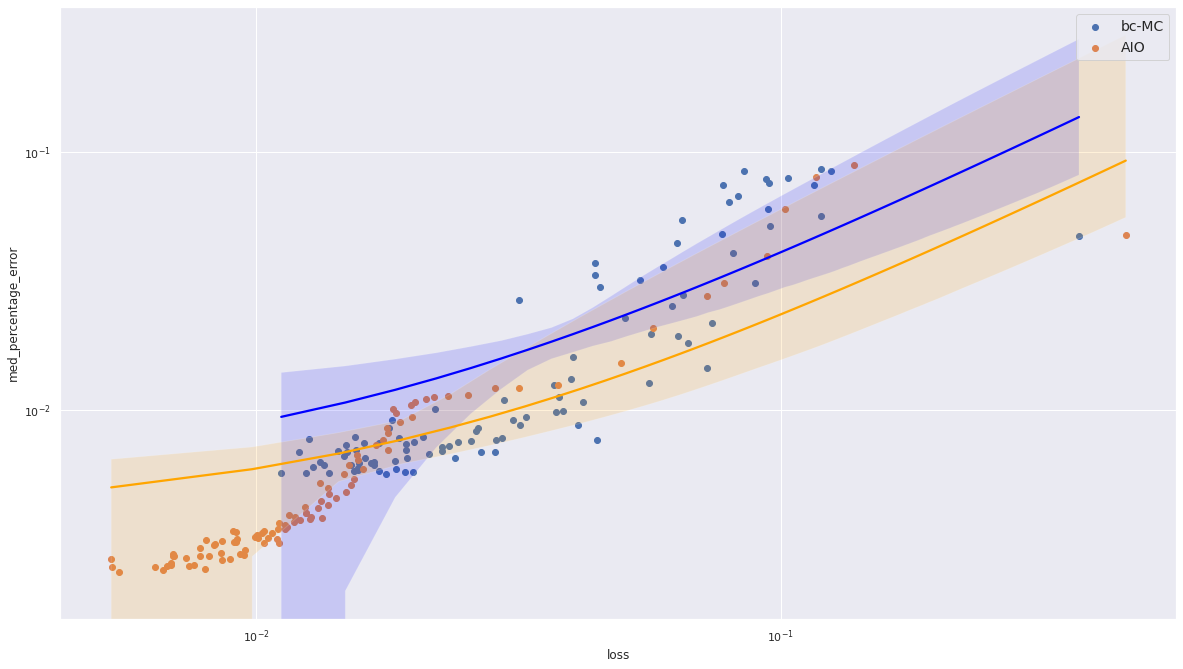

In [48]:
# Correlation loss and accuracy
plt.scatter(pd.Series(df_MC_average['loss']), pd.Series(df_MC_average['med_percentage_error']), label="bc-MC")
plt.scatter(pd.Series(df_AIO_average['loss']), pd.Series(df_AIO_average['med_percentage_error']), label="AIO")
sns.regplot(data=df_MC_average, x='loss', y='med_percentage_error', scatter = False, ci = 95, fit_reg = True, color = 'blue')
sns.regplot(data=df_AIO_average, x='loss', y='med_percentage_error', scatter = False, ci = 95, fit_reg = True, color = 'orange') 
plt.legend()
fig.tight_layout()
figname = output_folder + 'AIO_versus_MC_correlation_bc' + str(params.bc) + '.png'
plt.savefig(figname)
plt.xscale('log')
plt.yscale('log')

print("Correlation loss and median percentage error AIO: {}".format(df_AIO_average['loss'].corr(df_AIO_average['med_percentage_error'])))
print("Correlation loss and median percentage error MC: {}".format(df_MC_average['loss'].corr(df_MC_average['med_percentage_error'])))


---
---


### III.B. Less binding constraint

Same as section III.A, but I change the amount that can be borrowed (parameter `bc_chosen` below).

### Params

In [49]:
M_chosen = 100 ## Outer expectation 
N_chosen = 2 ## Inner expectation
lr_chosen = 1e-3 #0.5e-2
pre_train_model_chosen = False
nb_epochs_chosen = 10000
order_gauss = 1 #Default. order_gauss = 2
bc_chosen = 1.0 #Change the value of b (from 0 to 1.0)
σ_shocks_chosen = 0.01 #0.01
use_Sobol_chosen = False
optimizer_chosen = "Adam"
w1_chosen = 0.75
w2_chosen = 0.25

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                  w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.75
w2: 0.25


### Time iteration

In [50]:
# Initial guess for time iteration
σ = np.zeros((params.n_points_grid, params.n_points_grid, params.n_points_grid, params.n_points_grid, params.n_points_w))
        
for (r_index, r_value) in enumerate(params.r_grid):
    for (p_index, p_value) in enumerate(params.p_grid):
        for (q_index, q_value) in enumerate(params.q_grid):
            for (δ_index, δ_value) in enumerate(params.δ_grid):
                for (w_index, w_value) in enumerate(params.w_grid):
                    σ[r_index, p_index, q_index, δ_index, w_index] = 0.9*w_value

# Turn σ into a function via interpolation
σ_func = lambda x: interp(params.r_grid, params.p_grid, params.q_grid, params.δ_grid, params.w_grid, σ, x)

In [51]:
# Solve the model by time iteration and Gaussian quadrature
tol_chosen = 1e-5
max_iter_chosen = 100
verbose_chosen = True
print_skip_chosen = 1
do_plot_chosen = False

solve_model_time_iter_quadrature(params, σ, σ_func, 
                                 tol_chosen, max_iter_chosen, 
                                 verbose_chosen, print_skip_chosen, do_plot_chosen)

Error at iteration 1 is 1.20761575551894.
Error at iteration 2 is 0.4198695660078622.
Error at iteration 3 is 0.2098649061154565.
Error at iteration 4 is 0.1228591827834713.
Error at iteration 5 is 0.07993755718530404.
Error at iteration 6 is 0.0551343478732762.
Error at iteration 7 is 0.051080216562127245.
Error at iteration 8 is 0.05088266222948157.
Error at iteration 9 is 0.05085368584486272.
Error at iteration 10 is 0.040298059350047044.
Error at iteration 11 is 0.035883982970304595.
Error at iteration 12 is 0.03222601403061376.
Error at iteration 13 is 0.030803521824362745.
Error at iteration 14 is 0.02679324724676979.
Error at iteration 15 is 0.02209099100609624.
Error at iteration 16 is 0.018301735905883687.
Error at iteration 17 is 0.014566809459610086.
Error at iteration 18 is 0.011970636857721262.
Error at iteration 19 is 0.01015819316251032.
Error at iteration 20 is 0.008053920946925253.
Error at iteration 21 is 0.007043701757209364.
Error at iteration 22 is 0.00587445952851

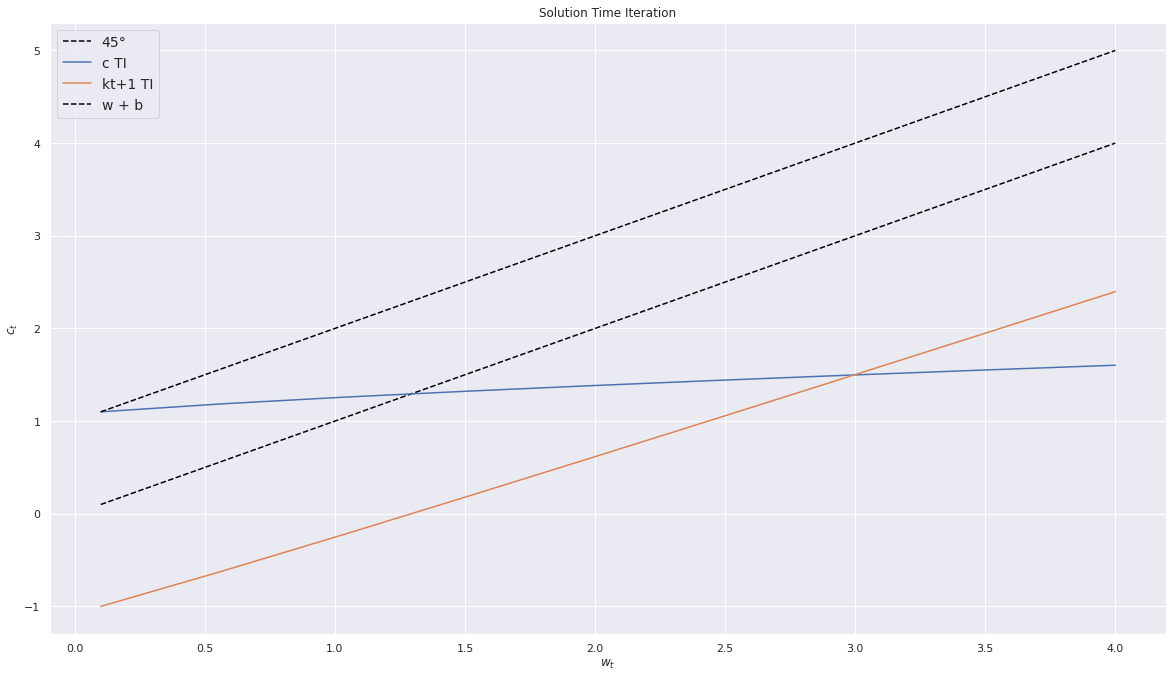

In [52]:
# Plot the result
len_wec = params.nb_points_test

with torch.no_grad():
    rvec = np.zeros(len_wec)
    pvec = np.zeros(len_wec)
    qvec = np.zeros(len_wec)
    δvec = np.zeros(len_wec)
    wvec = params.xvec_test
    state_next = np.column_stack((rvec, pvec, qvec, δvec, wvec))
    cvec_TI = params.c_function_TI(state_next) #σ_func(state_next)
    cvec_TI_bc_1 = cvec_TI.copy()
    k_next_TI = wvec.squeeze(1) - cvec_TI

plt.title("Multidimensional Consumption-Savings (decision rule) BEFORE TRAINING")
plt.plot(wvec, wvec, linestyle='--', color='black', label="45°")
plt.plot(wvec, cvec_TI, label='c TI')
plt.plot(wvec, k_next_TI, label='kt+1 TI')
#plt.plot(wvec, [params.bc for k in range(0, len(wvec))], linestyle='--', color='black', label="b")
plt.plot(wvec, wvec + params.bc, linestyle='--', color='black', label="w + b")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.title("Solution Time Iteration")
plt.legend()

Euler TI
Mean: 0.005454784668958331
Median: 0.003473862875793432
Min: 3.6800358016453316e-07
Max: 0.07900950956994834
std dev.: 0.007458029159050262
Euler Bis TI
Mean: 0.0027489003987521965
Median: 0.0017366993625149707
Min: 1.8400184087496996e-07
Max: 0.042011296062159476
std dev.: 0.003833711712695953
Max percentage deviation c1 and c2 4.114697714275593
Mean percentage deviation c1 and c2 0.27415813100076303
Median percentage deviation c1 and c2 0.17360462831288515


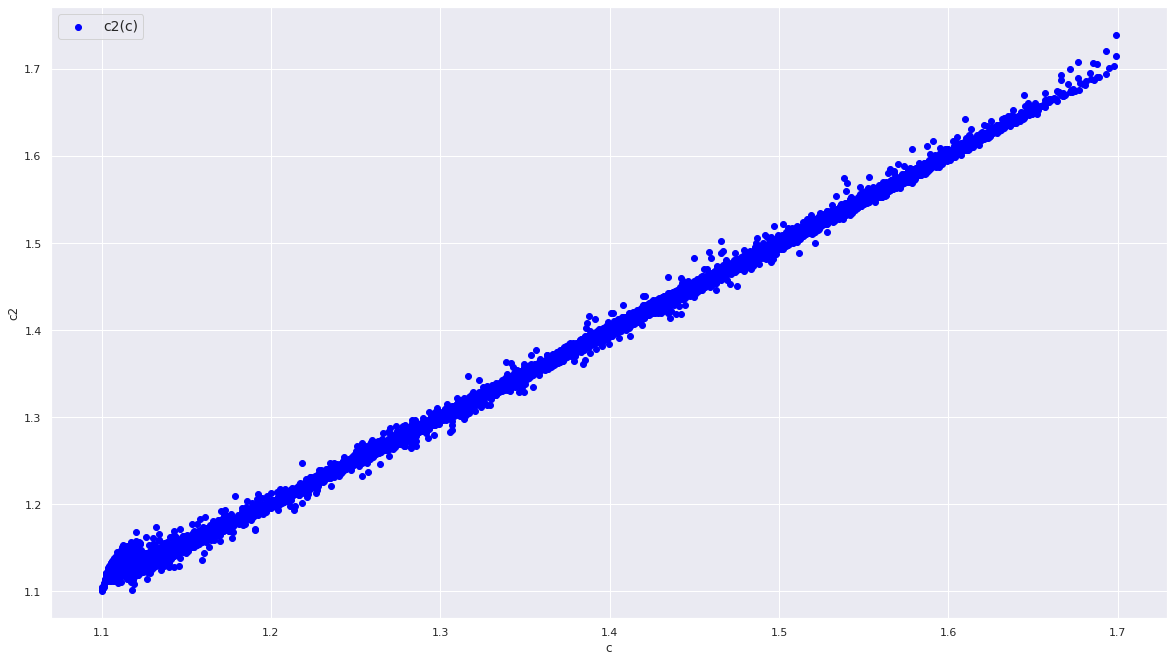

In [53]:
# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_TI_MC(10000, 100, params)

print("Euler TI")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("Euler Bis TI")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))


c2 = np.zeros(len(c))
BC_biding = np.zeros(len(c))*np.nan
for i in range(0, len(c)):
    c2[i] = (max(c_RHS[i], (w[i]+params.bc)**(-params.γ)))**(-1/params.γ)

plt.scatter(c, c2, label="c2(c)", color="blue")
plt.xlabel('c')
plt.ylabel('c2')
plt.legend()

per_deviation = 100*np.abs((c - c2)/(0.5*c + 0.5*c2))
print("Max percentage deviation c1 and c2 {}".format(np.max(per_deviation)))
print("Mean percentage deviation c1 and c2 {}".format(np.mean(per_deviation)))
print("Median percentage deviation c1 and c2 {}".format(np.median(per_deviation)))

### Estimate bc-MC once

Single training of NN using the bc-MC operator.

In [54]:
model_MC = NeuralNetwork().to(device)
print(model_MC)
use_same_draws = False
M_accuracy = 1000 #number of daws state space
N_accuracy = 100 #number of draws shocks for each state
freq_loss= 100 #frequence with with storing loss and accuracy

#seed=123
np.random.seed(seed_number)
torch.manual_seed(seed_number)

model_MC.train()

if params.optimizer == "Adam":
    optimizer = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
elif params.optimizer == "SGD":
    optimizer = torch.optim.SGD(model_MC.parameters(), params.lr)
elif params.optimizer == "SWA":
    base_opt = torch.optim.Adam(model_MC.parameters(), lr=params.lr, eps=1e-07, betas=(0.9, 0.999)) 
    optimizer = SWA(base_opt, swa_start=params.swa_start, swa_freq=params.swa_freq, swa_lr=params.lr)
else:
    raise("optimizer unknown")

scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=params.freq_gamma)

loss_epochs_MC = torch.zeros(params.nb_epochs)
list_MC_gradient = [] #store the norm of the gradient
list_perc_abs_error_MC = [] #store median abs value percentage error
list_perc_abs_error_MC_mean = [] #mean
list_perc_abs_error_MC_max = [] #max
list_perc_abs_error_MC_std = [] #std
list_perc_abs_error_MC_i = [] #store index i
list_perc_abs_error_MC_loss = [] #store loss

for i in tqdm(range(0, params.nb_epochs)):
    loss = Ξ_torch_MC(model_MC, params)
    loss_epochs_MC[[i]] = float(loss.item())

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % freq_loss == 0: #Monitor the gradient
        model_MC.eval()
        # Evaluate accuracy 
        with torch.no_grad():
            # frozen draws
            if use_same_draws==True:
                euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC_frozen(model_MC, params)
            else:
                # new fresh draws
                euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC(model_MC, M_accuracy, N_accuracy, params)
        list_perc_abs_error_MC.append(np.median(euler_bis))
        list_perc_abs_error_MC_mean.append(np.mean(euler_bis))
        list_perc_abs_error_MC_max.append(np.max(euler_bis))
        list_perc_abs_error_MC_std.append(np.std(euler_bis))
        list_perc_abs_error_MC_i.append(i)
        list_perc_abs_error_MC_loss.append(float(loss.item()))
        model_MC.train()
    if i % 1000 == 0:
        loss, current = float(loss.item()), i
        print(f"loss: {loss:>7f}, median euler error {list_perc_abs_error_MC[-1]:>7f}, [{current:>5d}/{params.nb_epochs:>5d}]")
    if (i % params.freq_scheduler == 0) & (i != 0) & (params.use_scheduler == True):
        scheduler.step()
        print("i : {}. Decreasing learning rate: {}".format(i, scheduler.get_last_lr()))

if params.optimizer == "SWA":
    optimizer.swap_swa_sgd()


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)


  0%|                                         | 6/10000 [00:00<02:52, 57.92it/s]

loss: 0.037478, median euler error 0.013848, [    0/10000]


 10%|███▊                                 | 1019/10000 [00:07<01:03, 141.66it/s]

loss: 0.000014, median euler error 0.004129, [ 1000/10000]


 20%|███████▍                             | 2026/10000 [00:14<01:01, 130.60it/s]

loss: 0.000040, median euler error 0.003556, [ 2000/10000]


 30%|███████████▏                         | 3031/10000 [00:21<00:46, 149.39it/s]

loss: -0.000066, median euler error 0.002684, [ 3000/10000]


 40%|██████████████▊                      | 4018/10000 [00:28<00:41, 143.20it/s]

loss: 0.000249, median euler error 0.002282, [ 4000/10000]


 50%|██████████████████▌                  | 5016/10000 [00:35<00:35, 140.46it/s]

loss: 0.000165, median euler error 0.002816, [ 5000/10000]


 60%|██████████████████████▎              | 6022/10000 [00:41<00:26, 149.76it/s]

loss: 0.000184, median euler error 0.002331, [ 6000/10000]


 70%|██████████████████████████           | 7032/10000 [00:48<00:19, 149.26it/s]

loss: -0.000061, median euler error 0.002235, [ 7000/10000]


 80%|█████████████████████████████▋       | 8034/10000 [00:55<00:12, 153.31it/s]

loss: 0.000239, median euler error 0.001847, [ 8000/10000]


 90%|█████████████████████████████████▍   | 9032/10000 [01:02<00:06, 143.63it/s]

loss: 0.000063, median euler error 0.002203, [ 9000/10000]


100%|████████████████████████████████████| 10000/10000 [01:08<00:00, 145.20it/s]


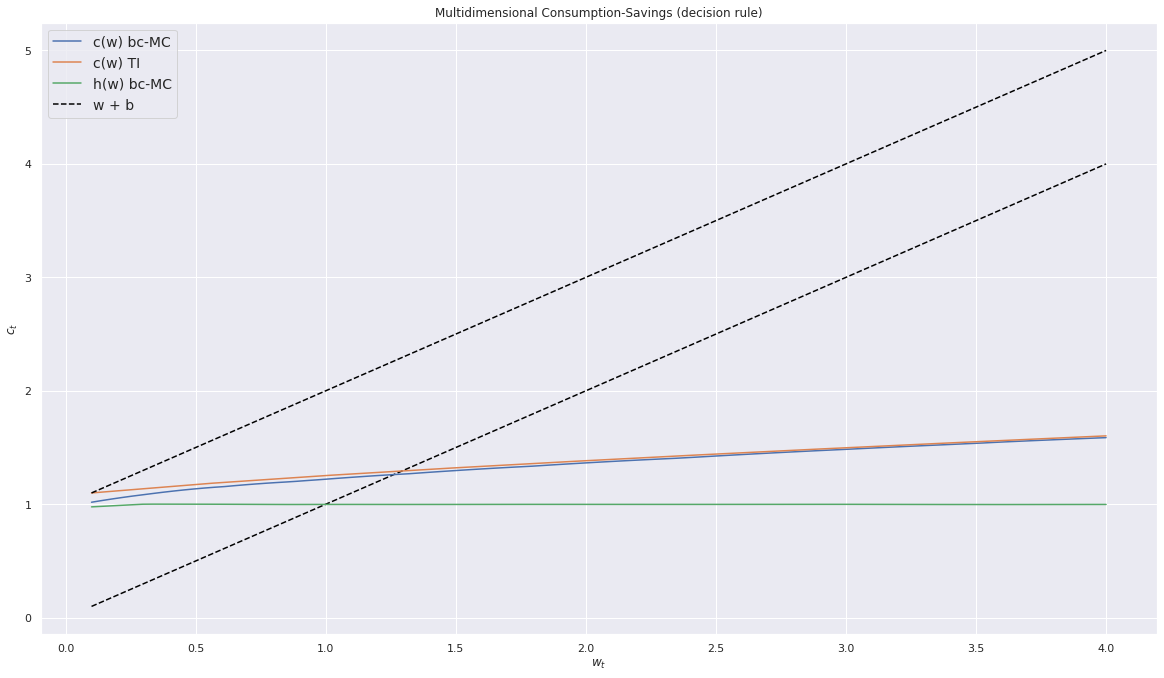

In [55]:
# Test approximation
model_MC.eval()

# Define the grid
nb_points = 100
with torch.no_grad():
    wvec_eval = torch.linspace(params.wmin, params.wmax, nb_points)
    rvec_eval = 0*torch.ones(nb_points) #torch.linspace(grid.σ_e_r_min, grid.σ_e_r_max, nb_points) #torch.zeros(nb_points)
    pvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    qvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)
    δvec_eval = 0*torch.ones(nb_points) #torch.zeros(nb_points)

    # To store vaules
    ζvec = torch.zeros(nb_points)
    hvec = torch.zeros(nb_points)
    cvec = torch.zeros(nb_points)

    cvec_MC, hvec_MC = model_normalized(model_MC, rvec_eval, pvec_eval, qvec_eval, δvec_eval, wvec_eval, params)
    # save for latter use
    cvec_MC_bc_1, hvec_MC_bc_1 = cvec_MC.detach().numpy(), hvec_MC.detach().numpy()
    
plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='--', color='black')
plt.plot(wvec_eval.detach().numpy(), cvec_MC.detach().numpy(), label="c(w) bc-MC")
plt.plot(wvec, cvec_TI, label='c(w) TI')
plt.plot(wvec_eval.detach().numpy(), hvec_MC.detach().numpy(), label="h(w) bc-MC")
#plt.plot(wvec, [params.bc for k in range(0, len(wvec))], linestyle='--', color='black', label="b")
plt.plot(wvec, wvec + params.bc, linestyle='--', color='black', label="w + b")
plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

Euler MC
Mean: 0.0055921380408108234
Median: 0.0043562352657318115
Min: 5.960464477539062e-07
Max: 0.09798526763916016
std dev.: 0.005846374202519655
Euler Bis MC
Mean: 0.0028047875966876745
Median: 0.002175629138946533
Min: 2.384185791015625e-07
Max: 0.05291461944580078
std dev.: 0.0030020063277333975
Max percentage deviation c1 and c2 5.15508093650527
Mean percentage deviation c1 and c2 0.2801785764100486
Median percentage deviation c1 and c2 0.2175695908437509
CPU times: user 2.23 s, sys: 4.29 ms, total: 2.23 s
Wall time: 375 ms


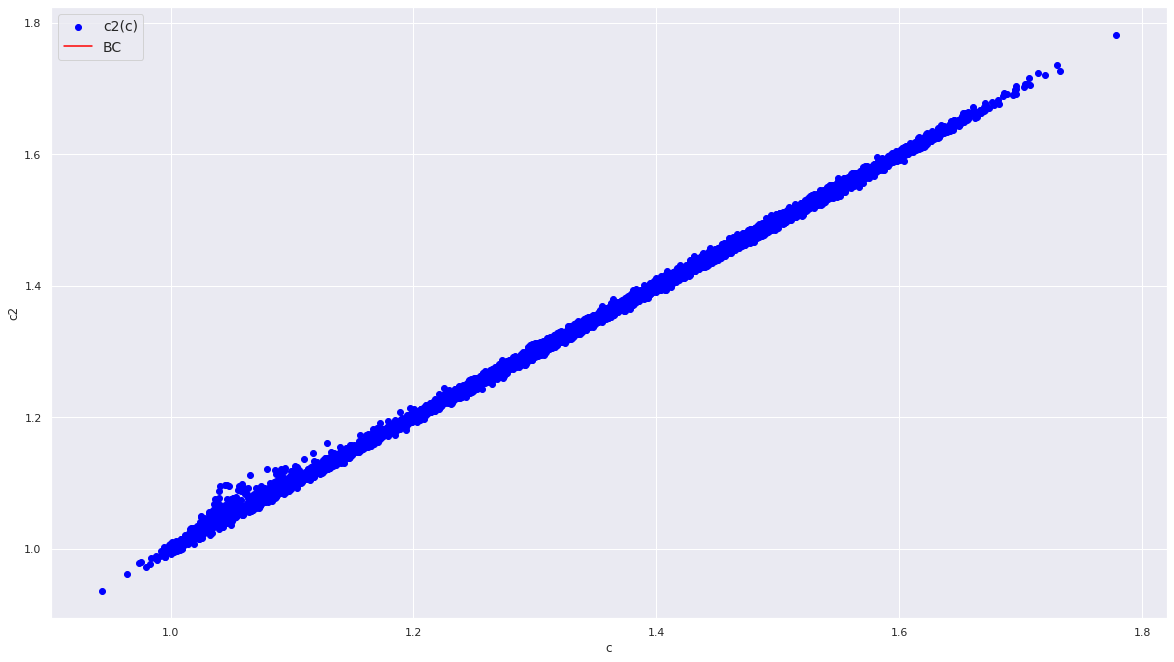

In [56]:
%%time 
model_MC.eval()

# Evaluate accuracy 
euler, euler_bis, c, c_RHS, w = evaluate_accuracy_pytorch_MC(model_MC, 10000, 100, params)

print("Euler MC")
print("Mean: {}".format(np.mean(np.abs(euler))))
print("Median: {}".format(np.median(np.abs(euler))))
print("Min: {}".format(np.min(np.abs(euler))))
print("Max: {}".format(np.max(np.abs(euler))))
print("std dev.: {}".format(np.std(np.abs(euler))))

# Should take the mean of the absolute value
print("Euler Bis MC")
print("Mean: {}".format(np.mean(np.abs(euler_bis))))
print("Median: {}".format(np.median(np.abs(euler_bis))))
print("Min: {}".format(np.min(np.abs(euler_bis))))
print("Max: {}".format(np.max(np.abs(euler_bis))))
print("std dev.: {}".format(np.std(np.abs(euler_bis))))

c2 = np.zeros(len(c))
BC_biding = np.zeros(len(c))*np.nan
for i in range(0, len(c)):
    c2[i] = (max(c_RHS[i], (w[i] + params.bc)**(-params.γ)))**(-1/params.γ)
    # Binding 
    if c_RHS[i] < (w[i] + params.bc)**(-params.γ):
        BC_biding[i] = ((w[i] + params.bc)**(-params.γ))**(-1/params.γ)
        
plt.scatter(c, c2, label="c2(c)", color="blue")
plt.plot(c, BC_biding, label="BC", color="red")
plt.xlabel('c')
plt.ylabel('c2')
plt.legend()

per_deviation = 100*np.abs((c - c2)/(0.5*c + 0.5*c2))
print("Max percentage deviation c1 and c2 {}".format(np.max(per_deviation)))
print("Mean percentage deviation c1 and c2 {}".format(np.mean(per_deviation)))
print("Median percentage deviation c1 and c2 {}".format(np.median(per_deviation)))

### Plot consumption rule for two parametrizations

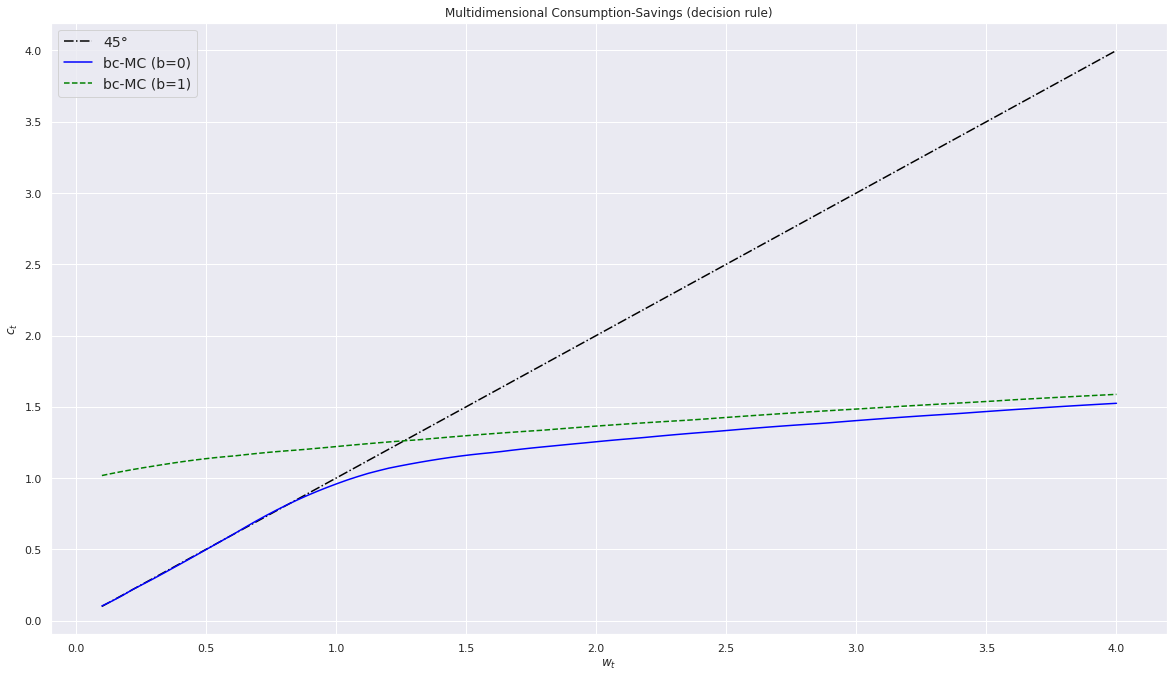

In [57]:
color_bc_1 = "green"
color_bc_0 = "blue"
plt.title("Multidimensional Consumption-Savings (decision rule)")
plt.plot(wvec_eval, wvec_eval, linestyle='-.', color='black', label="45°")
plt.plot(wvec_eval.detach().numpy(), cvec_MC_bc_0, label="bc-MC (b=0)", color=color_bc_0)
plt.plot(wvec_eval.detach().numpy(), cvec_MC_bc_1, label="bc-MC (b=1)", color=color_bc_1, linestyle="--")

plt.xlabel("$w_t$")
plt.ylabel("$c_t$")
plt.legend()

fig.tight_layout()
figname = output_folder + 'model_MC_bc_0_&_1.png'
plt.savefig(figname)
plt.show()


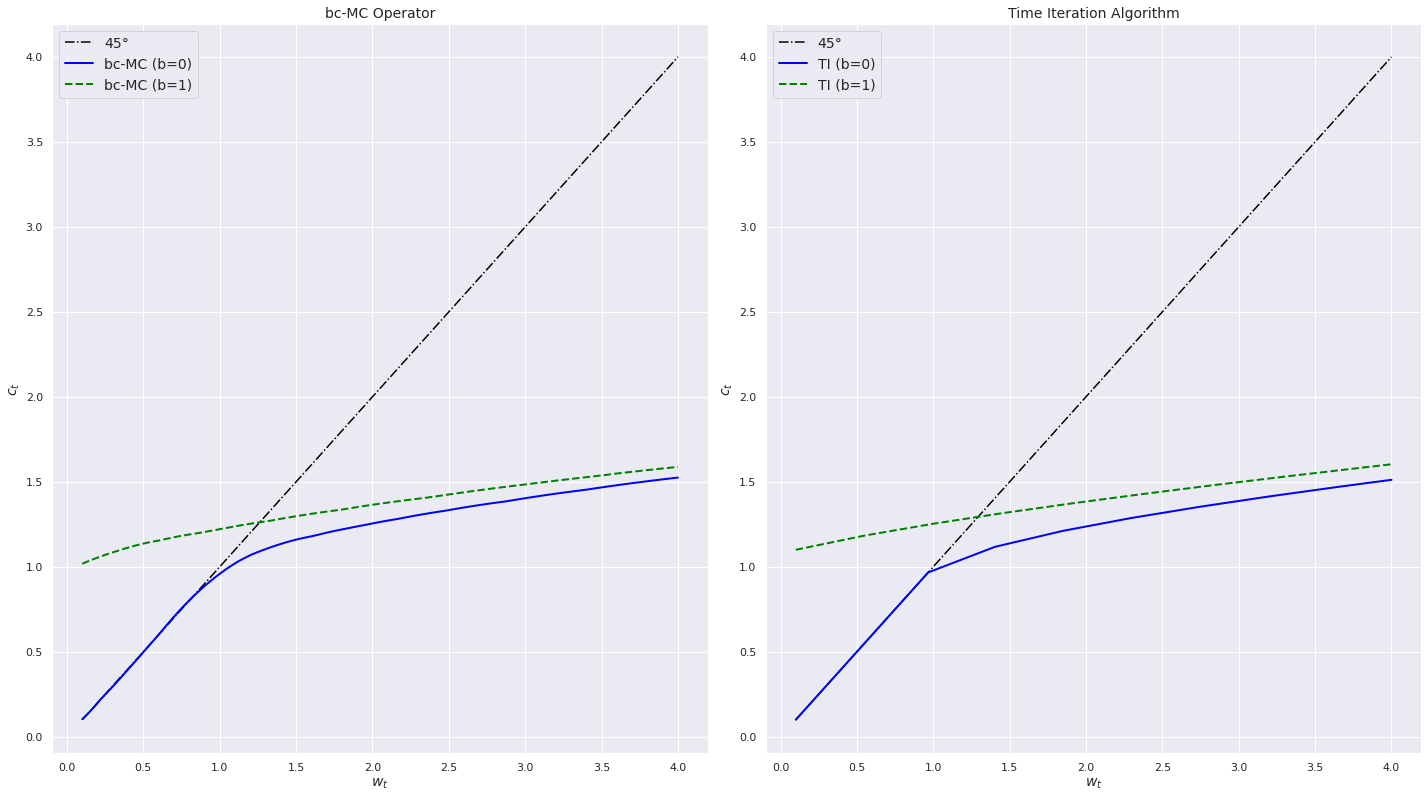

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)

color_bc_1 = "green"
color_bc_0 = "blue"
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE

ax1.plot(wvec_eval, wvec_eval, linestyle='-.', color='black', label="45°")
ax1.plot(wvec_eval.detach().numpy(), cvec_MC_bc_0, label="bc-MC (b=0)", color=color_bc_0, linewidth=linewidth_chosen)
ax1.plot(wvec_eval.detach().numpy(), cvec_MC_bc_1, label="bc-MC (b=1)", color=color_bc_1, linestyle="--", linewidth=linewidth_chosen)
ax1.legend()
ax1.set_xlabel("$w_t$",size=MEDIUM_SIZE)
ax1.set_ylabel("$c_t$",size=MEDIUM_SIZE)
ax1.set_title('bc-MC Operator',size=MEDIUM_SIZE)


ax2.plot(wvec_eval, wvec_eval, linestyle='-.', color='black', label="45°")
ax2.plot(wvec, cvec_TI_bc_0, label='TI (b=0)', color=color_bc_0, linewidth=linewidth_chosen)
ax2.plot(wvec, cvec_TI_bc_1, label='TI (b=1)', color=color_bc_1, linestyle="--", linewidth=linewidth_chosen)

ax2.set_xlabel("$w_t$",size=MEDIUM_SIZE)
ax2.set_ylabel("$c_t$",size=MEDIUM_SIZE)
ax2.set_title('Time Iteration Algorithm',size=MEDIUM_SIZE)
ax2.legend()

fig.tight_layout()
figname = output_folder + 'model_MC_&_TI_bc_0_&_1.png'
plt.savefig(figname, dpi = dpi_chosen)
plt.show()


Correlation loss and median percentage error: 0.6130835960899469


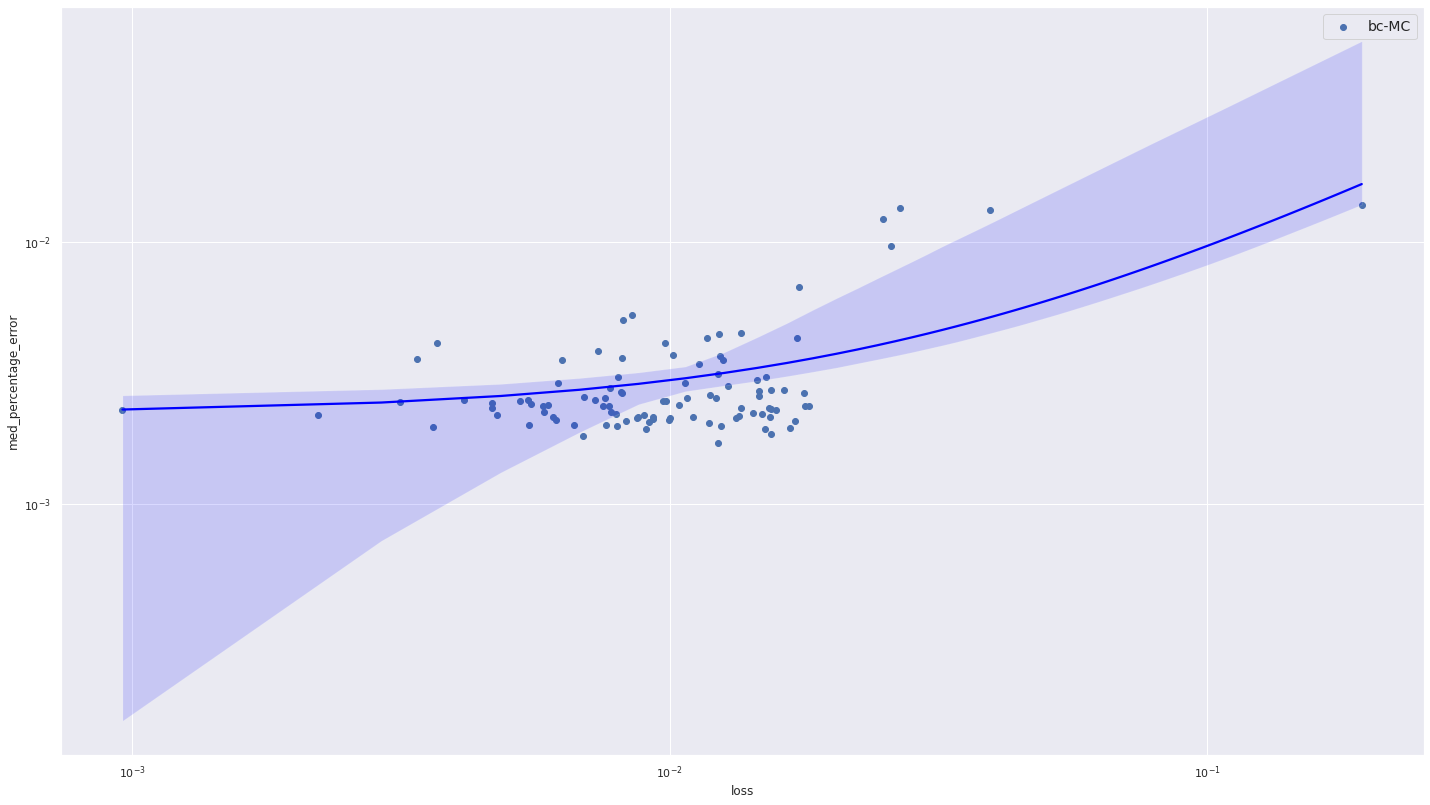

In [59]:
# Correlation loss and accuracy
df_test = pd.DataFrame({'loss': np.sqrt( np.abs(list_perc_abs_error_MC_loss)),
                       'med_percentage_error':list_perc_abs_error_MC})

fig, (ax1) = plt.subplots(1, 1)
ax1.scatter(pd.Series(df_test['loss']), pd.Series(df_test['med_percentage_error']), label="bc-MC")
sns.regplot(data=df_test, x='loss', y='med_percentage_error', scatter = False, ci = 95, fit_reg = True, color = 'blue')
plt.legend()
fig.tight_layout()

ax1.set_yscale('log')
ax1.set_xscale('log')
print("Correlation loss and median percentage error: {}".format(df_test['loss'].corr(df_test['med_percentage_error'])))

### Variance loss

In [60]:
%%time
# Calculate variance of loss. Used in the plot below
nb_iter_model = 2000 #1 # nb iterations before calculating the variance
nb_rep_model = 10 #number of repetitions of the process: iter model -> calculate variance of loss
nb_draws_var = 500 #number of independent draws to calculate the variance

initial_model = NeuralNetwork().to(device)

# Grid M and grid N
T = (params.M*params.N)/2
#grid_N = np.concatenate((np.ones(1), np.array([N for N in range(2, 200+2, 2)])))
grid_N = np.array([N for N in range(2, params.T+2, 2)])
grid_M = 2*T/grid_N

is_int = grid_M % 1 == 0
grid_N = grid_N[is_int]
grid_M = grid_M[is_int]

print(grid_N)
print(grid_M)
print(grid_N*grid_M)

df_variance_loss, df_variance_loss_median = calculate_variance_loss(params, nb_iter_model, 
                                                                    nb_rep_model, nb_draws_var, 
                                                                    grid_M, grid_N, 
                                                                    norm_chosen = 2.0, freq_accuracy=1000, 
                                                                    calculate_variance_gradient=True,
                                                                    initial_model=initial_model)

df_variance_loss_bc_one = df_variance_loss.copy()
df_variance_loss_median_bc_one = df_variance_loss_median.copy()

[  2   4   8  10  20  40  50 100]
[100.  50.  25.  20.  10.   5.   4.   2.]
[200. 200. 200. 200. 200. 200. 200. 200.]
Norm chosen: 2.0
Rep 0 / 10. Training a model for 2000 Iterations
loss: 0.025177, median percentage euler error 0.014066, [    0/ 2000]
loss: -0.000241, median percentage euler error 0.003251, [ 1000/ 2000]
Rep 0 / 10. Calculting variance loss for 500 Iterations
Rep 0 / 10. Calculting variance norm gradient for 500 Iterations
Rep 1 / 10. Training a model for 2000 Iterations
loss: 0.025664, median percentage euler error 0.014049, [    0/ 2000]
loss: 0.000236, median percentage euler error 0.003610, [ 1000/ 2000]
Rep 1 / 10. Calculting variance loss for 500 Iterations
Rep 1 / 10. Calculting variance norm gradient for 500 Iterations
Rep 2 / 10. Training a model for 2000 Iterations
loss: 0.025679, median percentage euler error 0.014050, [    0/ 2000]
loss: 0.000219, median percentage euler error 0.003596, [ 1000/ 2000]
Rep 2 / 10. Calculting variance loss for 500 Iterations

/tmp/ipykernel_7619/723908643.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
/tmp/ipykernel_7619/723908643.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])
/tmp/ipykernel_7619/723908643.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  min_M_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['M'])
/tmp/ipykernel_7619/723908643.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) i

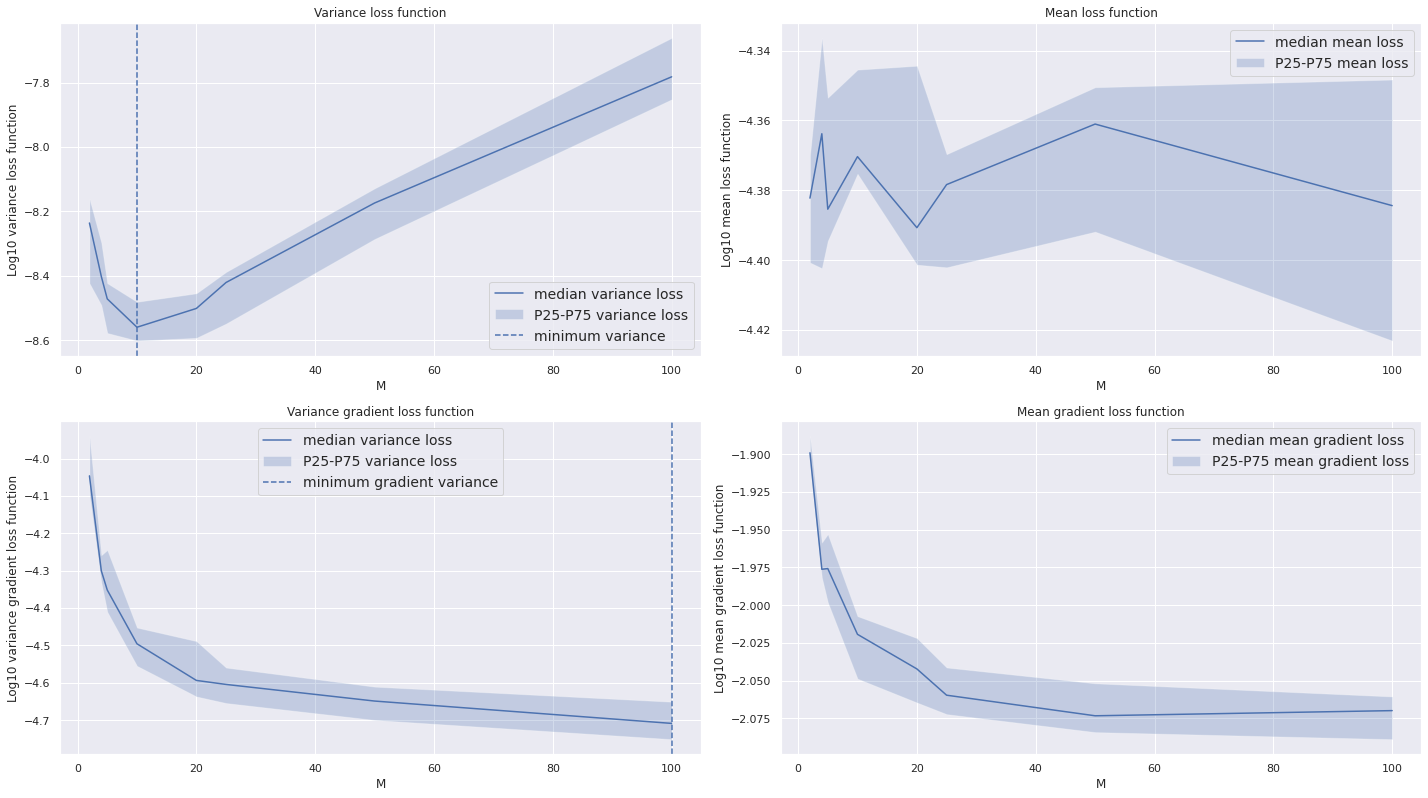

In [61]:
min_var = np.min(df_variance_loss_median['P50_var_loss'])
min_M = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['M'])
min_N = int(df_variance_loss_median[df_variance_loss_median['P50_var_loss'] == min_var]['N'])

try:
    min_var_grad = np.min(df_variance_loss_median['P50_var_gradient_loss'])
    min_M_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['M'])
    min_N_grad = int(df_variance_loss_median[df_variance_loss_median['P50_var_gradient_loss'] == min_var_grad]['N'])
except:
    print("error")
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_var_loss']), label="median variance loss")
ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline(min_M, label="minimum variance", linestyle="--")
ax1.set_xlabel("M")
ax1.set_ylabel("Log10 variance loss function")
ax1.set_title('Variance loss function')
ax1.legend()

ax2.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_mean_loss']), label="median mean loss")
ax2.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_mean_loss']), np.log10(df_variance_loss_median['P75_mean_loss']), label="P25-P75 mean loss", alpha=0.25)
ax2.set_xlabel("M")
ax2.set_ylabel("Log10 mean loss function")
ax2.set_title('Mean loss function')
ax2.legend()

ax3.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_var_gradient_loss']), label="median variance loss")
ax3.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_gradient_loss']), np.log10(df_variance_loss_median['P75_var_gradient_loss']), label="P25-P75 variance loss", alpha=0.25)
ax3.axvline(min_M_grad, label="minimum gradient variance", linestyle="--")
ax3.set_xlabel("M")
ax3.set_ylabel("Log10 variance gradient loss function")
ax3.set_title('Variance gradient loss function')
ax3.legend()

ax4.plot(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P50_mean_gradient_loss']), label="median mean gradient loss")
ax4.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_mean_gradient_loss']), np.log10(df_variance_loss_median['P75_mean_gradient_loss']), label="P25-P75 mean gradient loss", alpha=0.25)
ax4.set_xlabel("M")
ax4.set_ylabel("Log10 mean gradient loss function")
ax4.set_title('Mean gradient loss function')
ax4.legend()

fig.tight_layout()
figname = output_folder + 'variance_loss_bc_' + str(params.bc) + 'bc_1.png'
plt.savefig(figname)
plt.show()


### Several runs AIO (N=2)

In [62]:
M_chosen = 100 ## Outer expectation 
N_chosen = 2 ## Inner expectation
nb_epochs_chosen = 10000 #number of epochs

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                  w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([100, 200])
W_expanded.shape: torch.Size([200, 200])
M: 100
N: 2
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.75
w2: 0.25


In [63]:
%%time
nb_rep = 10 #number of different trainings, holding the initial values cst
freq_loss_chosen = 100 #20 #monitor accuracy every 10 iterations of gradient step (the smaller, the more time it takes)
use_same_draws_chosen = True
M_accuracy_chosen = 1000
N_accuracy_chosen = 100
# Calculate several runs, with similar initial guess

df_AIO, df_AIO_average = calculate_several_runs(params, nb_rep, 
                                                freq_loss = freq_loss_chosen,
                                                initial_model=initial_model,
                                                use_same_draws = use_same_draws_chosen, 
                                                M_accuracy = M_accuracy_chosen, 
                                                N_accuracy = N_accuracy_chosen)

df_AIO_bc_one = df_AIO.copy()
df_AIO_average_bc_one = df_AIO_average.copy()

Training model : 0 / 10
loss: 0.024256 [    0/10000]
loss: 0.000178 [ 1000/10000]
loss: 0.000206 [ 2000/10000]
loss: 0.000097 [ 3000/10000]
loss: -0.000004 [ 4000/10000]
loss: -0.000045 [ 5000/10000]
loss: -0.000063 [ 6000/10000]
loss: -0.000026 [ 7000/10000]
loss: -0.000246 [ 8000/10000]
loss: 0.000268 [ 9000/10000]
Training model : 1 / 10
loss: 0.021696 [    0/10000]
loss: -0.000280 [ 1000/10000]
loss: -0.000008 [ 2000/10000]
loss: 0.000098 [ 3000/10000]
loss: 0.000305 [ 4000/10000]
loss: -0.000206 [ 5000/10000]
loss: 0.000120 [ 6000/10000]
loss: 0.000032 [ 7000/10000]
loss: -0.000075 [ 8000/10000]
loss: -0.000166 [ 9000/10000]
Training model : 2 / 10
loss: 0.023999 [    0/10000]
loss: 0.000050 [ 1000/10000]
loss: 0.000088 [ 2000/10000]
loss: -0.000095 [ 3000/10000]
loss: -0.000027 [ 4000/10000]
loss: 0.000133 [ 5000/10000]
loss: 0.000008 [ 6000/10000]
loss: -0.000142 [ 7000/10000]
loss: -0.000017 [ 8000/10000]
loss: 0.000060 [ 9000/10000]
Training model : 3 / 10
loss: 0.025093 [    

In [64]:
#df_AIO.to_csv(output_folder + 'df_AIO_bc' + str(params.bc) + '.csv', index=False)
#df_AIO_average.to_csv(output_folder + 'df_AIO_average_bc' + str(params.bc) + '.csv', index=False)

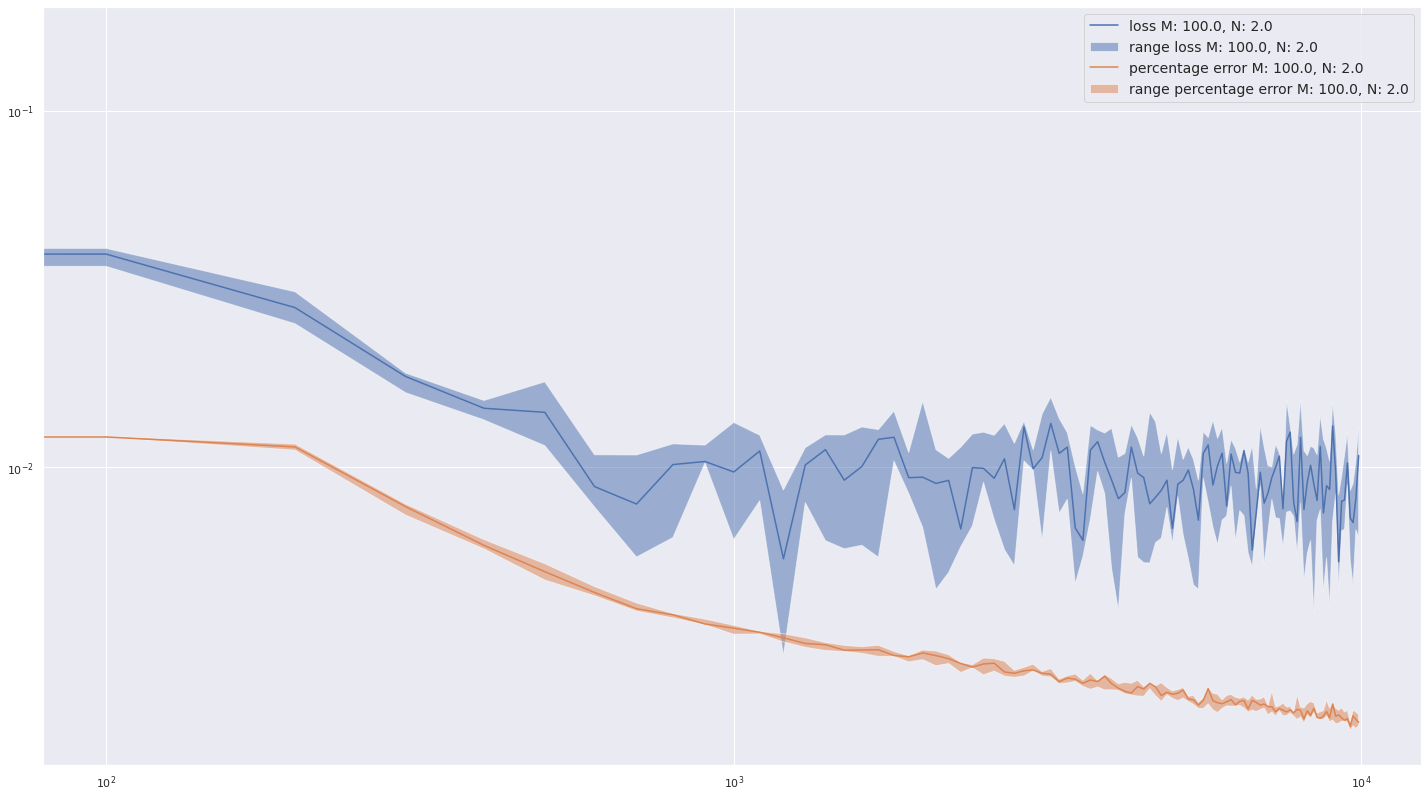

In [65]:
fig, ax = plt.subplots()
ax.plot(df_AIO_average['iter'], df_AIO_average['P50_loss'], label="loss M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]))
ax.fill_between(df_AIO_average['iter'],  df_AIO_average['P25_loss'], df_AIO_average['P75_loss'], label="range loss M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]), alpha=0.5)

ax.plot(df_AIO_average['iter'], df_AIO_average['P50_med_percentage_error'], label="percentage error M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]))
ax.fill_between(df_AIO_average['iter'],  df_AIO_average['P25_med_percentage_error'], df_AIO_average['P75_med_percentage_error'], label="range percentage error M: {}, N: {}".format(df_AIO_average['M'].values[0], df_AIO_average['N'].values[0]), alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()
fig.tight_layout()

### Several runs bc-MC with optimal M and N

In [66]:
M_chosen = min_M ##outer expectation 
N_chosen = min_N ## Inner expectation

params = MyParams(N_chosen, M_chosen, lr_chosen, pre_train_model_chosen, 
                  nb_epochs_chosen, bc_chosen, order_gauss,
                  σ_shocks_chosen, use_Sobol_chosen, optimizer_chosen,
                  w1_chosen, w2_chosen)

show_params(params)

learning rate: 0.001
nb epochs: 10000
W.shape: torch.Size([10, 200])
W_expanded.shape: torch.Size([200, 200])
M: 10
N: 20
MN: 200
T: 100
T: False
Number nodes Gaussian Q: (4, 9)
W Gaussian shape: torch.Size([22, 198])
N Gaussian: 9
M Gaussian: 22
MN Gaussian: 198
Budget constraint: 1.0
σ_shocks: 0.01
use_Sobol: False
optimizer_chosen: Adam
use_scheduler: False
w1: 0.75
w2: 0.25


In [67]:
%%time
df_MC, df_MC_average = calculate_several_runs(params, nb_rep, 
                                                freq_loss = freq_loss_chosen,
                                                initial_model=initial_model,
                                                use_same_draws = use_same_draws_chosen, 
                                                M_accuracy = M_accuracy_chosen, 
                                                N_accuracy = N_accuracy_chosen)

df_MC_bc_one = df_MC.copy()
df_MC_average_bc_one = df_MC_average.copy()

Training model : 0 / 10
loss: 0.021903 [    0/10000]
loss: 0.000208 [ 1000/10000]
loss: 0.000091 [ 2000/10000]
loss: -0.000017 [ 3000/10000]
loss: 0.000063 [ 4000/10000]
loss: 0.000059 [ 5000/10000]
loss: -0.000000 [ 6000/10000]
loss: 0.000058 [ 7000/10000]
loss: 0.000036 [ 8000/10000]
loss: 0.000064 [ 9000/10000]
Training model : 1 / 10
loss: 0.020355 [    0/10000]
loss: 0.000002 [ 1000/10000]
loss: 0.000076 [ 2000/10000]
loss: 0.000038 [ 3000/10000]
loss: -0.000001 [ 4000/10000]
loss: 0.000044 [ 5000/10000]
loss: 0.000109 [ 6000/10000]
loss: 0.000064 [ 7000/10000]
loss: 0.000002 [ 8000/10000]
loss: 0.000008 [ 9000/10000]
Training model : 2 / 10
loss: 0.025291 [    0/10000]
loss: 0.000074 [ 1000/10000]
loss: 0.000055 [ 2000/10000]
loss: -0.000025 [ 3000/10000]
loss: 0.000050 [ 4000/10000]
loss: 0.000028 [ 5000/10000]
loss: -0.000009 [ 6000/10000]
loss: 0.000045 [ 7000/10000]
loss: -0.000011 [ 8000/10000]
loss: 0.000061 [ 9000/10000]
Training model : 3 / 10
loss: 0.021180 [    0/10000]

In [69]:
if save_to_csv == True:
    print("Saving to CSV")
    df_MC_bc_one.to_csv(output_folder + 'df_MC_bc' + str(params.bc) + '.csv', index=False)
    df_MC_average_bc_one.to_csv(output_folder + 'df_MC_average_bc' + str(params.bc) + '.csv', index=False)
    df_AIO_bc_one.to_csv(output_folder + 'df_AIO_bc' + str(params.bc) + '.csv', index=False)
    df_AIO_average_bc_one.to_csv(output_folder + 'df_AIO_average_bc' + str(params.bc) + '.csv', index=False)
    df_variance_loss_bc_one.to_csv(output_folder + 'df_variance_loss_bc' + str(params.bc) + '.csv', index=False)
    df_variance_loss_median_bc_one.to_csv(output_folder + 'df_variance_loss_median_bc' + str(params.bc) + '.csv', index=False)

if read_from_csv == True:
    print("Reading from CSV")
    # Read from .csv
    df_MC = pd.read_csv(output_folder + 'df_MC_bc' + str(params.bc) + '.csv')
    df_MC_average = pd.read_csv(output_folder + 'df_MC_average_bc' + str(params.bc) + '.csv')
    df_AIO = pd.read_csv(output_folder + 'df_AIO_bc' + str(params.bc) + '.csv')
    df_AIO_average = pd.read_csv(output_folder + 'df_AIO_average_bc' + str(params.bc) + '.csv')
    df_variance_loss = pd.read_csv(output_folder + 'df_variance_loss_bc' + str(params.bc) + '.csv')
    df_variance_loss_median = pd.read_csv(output_folder + 'df_variance_loss_median_bc' + str(params.bc) + '.csv')
 

Saving to CSV
Reading from CSV


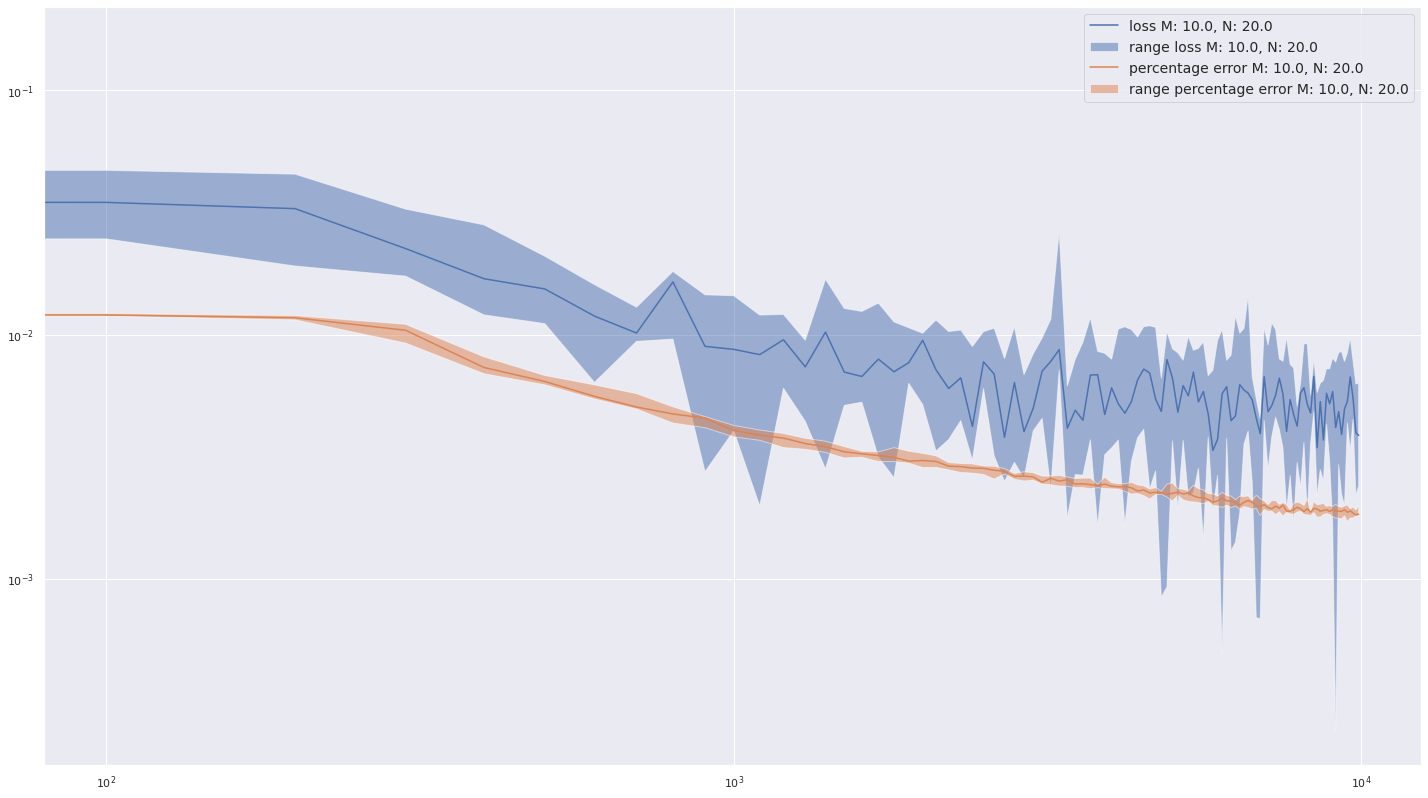

In [70]:
fig, ax = plt.subplots()
ax.plot(df_MC_average['iter'], df_MC_average['P50_loss'], label="loss M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]))
ax.fill_between(df_MC_average['iter'],  df_MC_average['P10_loss'], df_MC_average['P90_loss'], label="range loss M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]), alpha=0.5)

ax.plot(df_MC_average['iter'], df_MC_average['P50_med_percentage_error'], label="percentage error M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]))
ax.fill_between(df_MC_average['iter'],  df_MC_average['P10_med_percentage_error'], df_MC_average['P90_med_percentage_error'], label="range percentage error M: {}, N: {}".format(df_MC_average['M'].values[0], df_MC_average['N'].values[0]), alpha=0.5)

plt.xscale('log')
plt.yscale('log')
plt.legend()
fig.tight_layout()

### Combined Plots

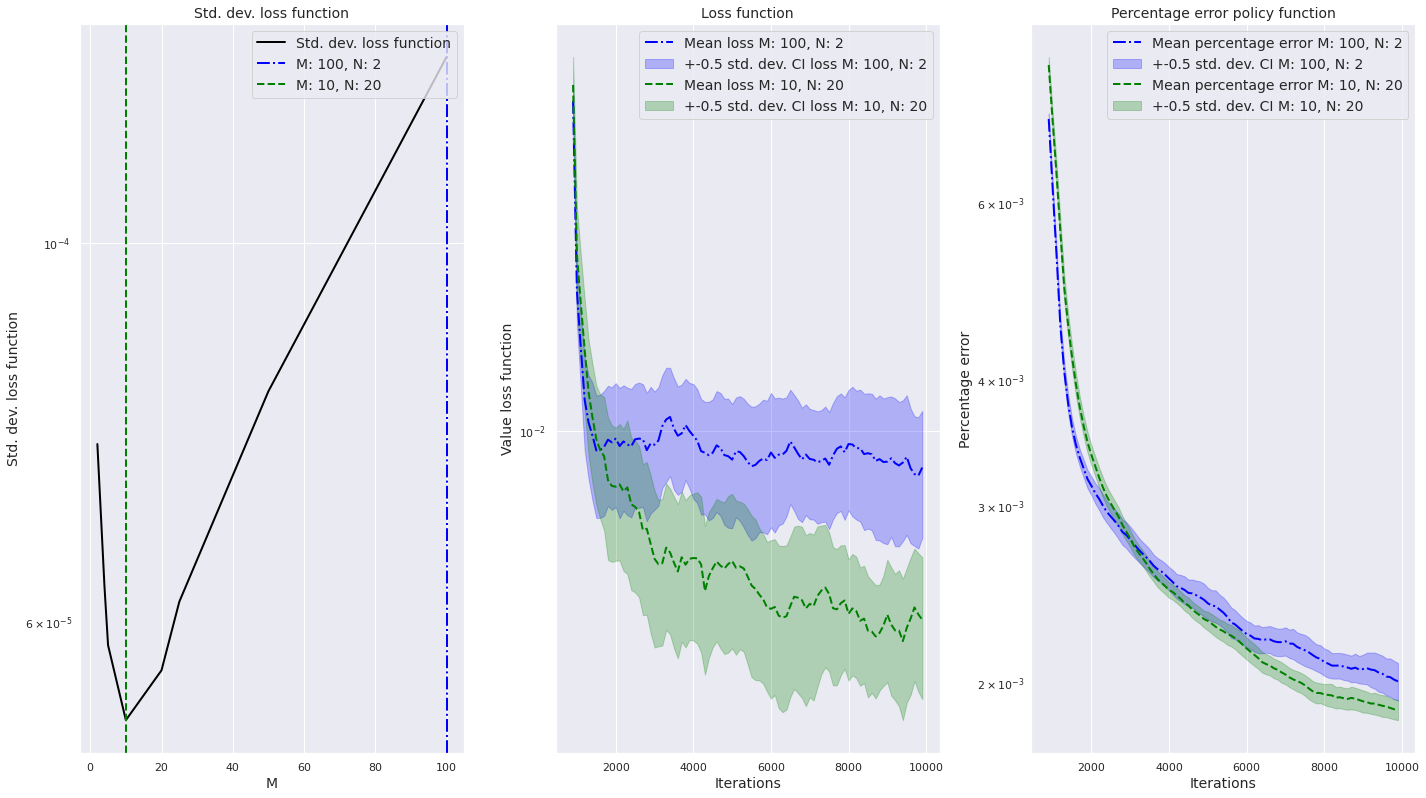

In [71]:
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)
plt.rcParams['legend.fontsize'] = MEDIUM_SIZE

# Use one standard deviation band
rate_P50 = 10 #rate for the average
rate_rolling_stddev = 10 #rate for the stddev.
rate = 10 #rate for the std. bounds
mult_std = 0.5
min_val = 1e-12

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Loss AIO
linestyle_AIO = "-."
linestyle_MC = "--"
color_AIO = "blue"
color_MC = "green"

M_AIO = int(df_AIO_average['M'].values[0])
N_AIO = int(df_AIO_average['N'].values[0])

M_MC = int(df_MC_average['M'].values[0])
N_MC = int(df_MC_average['N'].values[0])

# Std. dev. loss
ax1.plot(df_variance_loss_median['M'], df_variance_loss_median['P50_std_loss'], label="Std. dev. loss function", color="black", linewidth=linewidth_chosen)
#ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline([params.T], label="M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax1.axvline([M_chosen], label="M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax1.set_xlabel("M",size=MEDIUM_SIZE)
ax1.set_ylabel("Std. dev. loss function",size=MEDIUM_SIZE)
ax1.set_title('Std. dev. loss function',size=MEDIUM_SIZE)
ax1.legend(loc='upper right')

# Loss AIO
std_series = df_AIO_average['std_loss']
ax2.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax2.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Loss Monte Carlo
std_series = df_MC_average['std_loss']
ax2.plot(df_MC_average['iter'], pd.Series(df_MC_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax2.fill_between(df_MC_average['iter'],  pd.Series(np.maximum(df_MC_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)
ax2.set_title('Loss function',size=MEDIUM_SIZE)
ax2.set_xlabel("Iterations",size=MEDIUM_SIZE)
ax2.set_ylabel("Value loss function",size=MEDIUM_SIZE)
ax2.legend()

# Error AIO
mult_std = 0.5

std_series = df_AIO_average['std_med_percentage_error']
ax3.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO, linewidth=linewidth_chosen)
ax3.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Error MC
std_series = df_MC_average['std_med_percentage_error']
ax3.plot(df_MC_average['iter'], pd.Series(df_MC_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC, linewidth=linewidth_chosen)
ax3.fill_between(df_MC_average['iter'], pd.Series(np.maximum(df_MC_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)

ax3.set_xlabel("Iterations",size=MEDIUM_SIZE)
ax3.set_ylabel("Percentage error",size=MEDIUM_SIZE)
ax3.set_title('Percentage error policy function',size=MEDIUM_SIZE)
ax3.legend()

ax1.set_yscale('log')
#ax1_bis.set_xscale('log')
#ax2.set_xscale('log')
ax2.set_yscale('log')
#ax3.set_xscale('log')
ax3.set_yscale('log')


fig.tight_layout()

figname = output_folder + 'AIO_versus_MC_several_runs_2_bc' + str(params.bc) + '.png'
plt.savefig(figname, dpi=dpi_chosen)
plt.show()

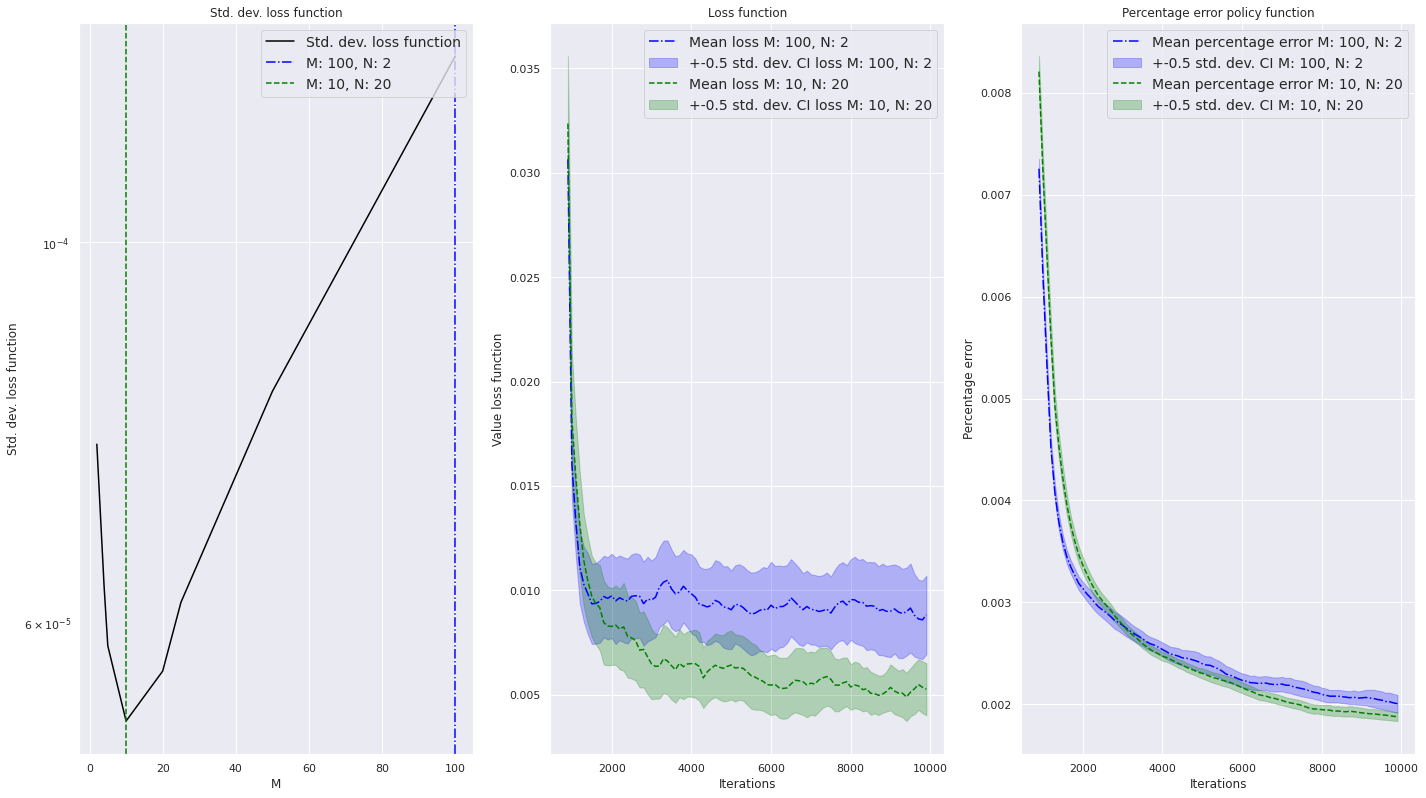

In [72]:
plot_scale = 1.25
plt.rcParams["figure.figsize"] = (plot_scale*16, plot_scale*9)

# Use one standard deviation band
rate_P50 = 10 #rate for the average
rate_rolling_stddev = 10 #rate for the stddev.
rate = 10 #rate for the std. bounds
mult_std = 0.5
min_val = 1e-12

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Loss AIO
linestyle_AIO = "-."
linestyle_MC = "--"
color_AIO = "blue"
color_MC = "green"

M_AIO = int(df_AIO_average['M'].values[0])
N_AIO = int(df_AIO_average['N'].values[0])

M_MC = int(df_MC_average['M'].values[0])
N_MC = int(df_MC_average['N'].values[0])

# Std. dev. loss
ax1.plot(df_variance_loss_median['M'], df_variance_loss_median['P50_std_loss'], label="Std. dev. loss function", color="black")
#ax1.fill_between(df_variance_loss_median['M'], np.log10(df_variance_loss_median['P25_var_loss']), np.log10(df_variance_loss_median['P75_var_loss']), label="P25-P75 variance loss", alpha=0.25)
ax1.axvline([params.T], label="M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax1.axvline([M_chosen], label="M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax1.set_xlabel("M")
ax1.set_ylabel("Std. dev. loss function")
ax1.set_title('Std. dev. loss function')
ax1.legend(loc='upper right')

# Loss AIO
std_series = df_AIO_average['std_loss']
ax2.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax2.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Loss Monte Carlo
std_series = df_MC_average['std_loss']
ax2.plot(df_MC_average['iter'], pd.Series(df_MC_average['loss']).rolling(rate).mean(), label="Mean loss M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax2.fill_between(df_MC_average['iter'],  pd.Series(np.maximum(df_MC_average['loss'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['loss'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI loss M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)
ax2.set_title('Loss function')
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Value loss function")
ax2.legend()

# Error AIO
mult_std = 0.5

std_series = df_AIO_average['std_med_percentage_error']
ax3.plot(df_AIO_average['iter'], pd.Series(df_AIO_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_AIO, N_AIO), linestyle=linestyle_AIO, color=color_AIO)
ax3.fill_between(df_AIO_average['iter'],  pd.Series(np.maximum(df_AIO_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_AIO_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_AIO, N_AIO), alpha=0.25, color=color_AIO)
# Error MC
std_series = df_MC_average['std_med_percentage_error']
ax3.plot(df_MC_average['iter'], pd.Series(df_MC_average['med_percentage_error']).rolling(rate_P50).mean(), label="Mean percentage error M: {}, N: {}".format(M_MC, N_MC), linestyle=linestyle_MC, color=color_MC)
ax3.fill_between(df_MC_average['iter'], pd.Series(np.maximum(df_MC_average['med_percentage_error'] - mult_std*std_series, min_val)).rolling(rate).mean(), pd.Series(df_MC_average['med_percentage_error'] + mult_std*std_series).rolling(rate).mean(), label="+-{} std. dev. CI M: {}, N: {}".format(mult_std, M_MC, N_MC), alpha=0.25, color=color_MC)

ax3.set_xlabel("Iterations")
ax3.set_ylabel("Percentage error")
ax3.set_title('Percentage error policy function')
ax3.legend()

ax1.set_yscale('log')
#ax1_bis.set_xscale('log')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#ax3.set_xscale('log')
#ax3.set_yscale('log')


fig.tight_layout()

figname = output_folder + 'AIO_versus_MC_several_runs_2_bc' + str(params.bc) + '_linear_scale.png'
plt.savefig(figname)
plt.show()

In [73]:
# Compare levels of losses and accuracy
rate_P50 = 10
rate = 10
mult_std = 1.0
min_val = 1e-12
last_loss_AIO = pd.Series(df_AIO_average['loss']).rolling(rate).mean().values[-1]
last_loss_MC = pd.Series(df_MC_average['loss']).rolling(rate).mean().values[-1]

print("-------------------------")
print("Comparing levels")
print("Final loss AIO: {}".format(last_loss_AIO))
print("Final loss MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

last_loss_AIO = pd.Series(df_AIO_average['med_percentage_error']).rolling(rate).mean().values[-1]
last_loss_MC = pd.Series(df_MC_average['med_percentage_error']).rolling(rate).mean().values[-1]

print("Median % error AIO: {}".format(last_loss_AIO))
print("Median % error MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

print("-------------------------")
print("Comparing std deviations")
last_loss_AIO = df_AIO_average['std_loss'].values[-1]
last_loss_MC = df_MC_average['std_loss'].values[-1]

print("Final std dev. loss AIO: {}".format(last_loss_AIO))
print("Final std dev.  loss MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

last_loss_AIO = df_AIO_average['med_percentage_error'].values[-1]
last_loss_MC = df_MC_average['med_percentage_error'].values[-1]

print("Final std dev. euler error AIO: {}".format(last_loss_AIO))
print("Final std dev. euler error MC: {}".format(last_loss_MC))
print("% difference: {}".format(100*(last_loss_AIO/last_loss_MC - 1.0)))

-------------------------
Comparing levels
Final loss AIO: 0.008832621536897432
Final loss MC: 0.005269921871543621
% difference: 67.6044114542111
Median % error AIO: 0.0020072820500000002
Median % error MC: 0.00188066281
% difference: 6.732692289480657
-------------------------
Comparing std deviations
Final std dev. loss AIO: 0.0036732304877459
Final std dev.  loss MC: 0.0022053405713315
% difference: 66.56069069314516
Final std dev. euler error AIO: 0.001957617
Final std dev. euler error MC: 0.0018742762
% difference: 4.446559157076213


Correlation loss and median percentage error AIO: 0.7527804475801066
Correlation loss and median percentage error MC: 0.7573273999824052


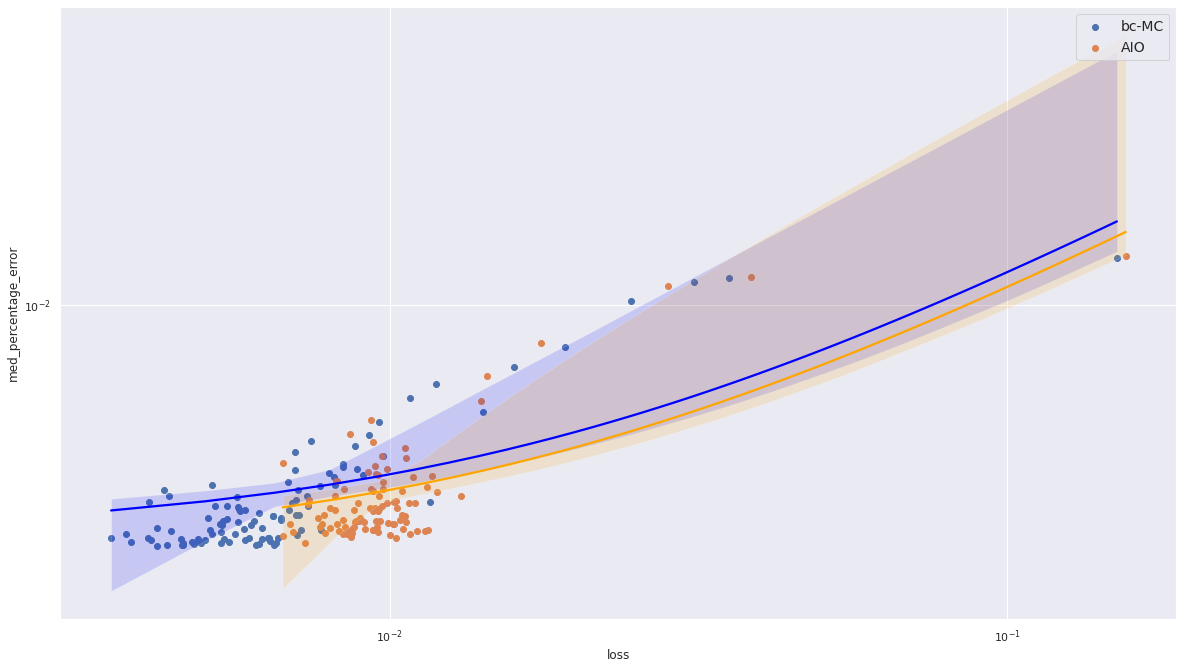

In [74]:
# Correlation loss and accuracy
plt.scatter(pd.Series(df_MC_average['loss']), pd.Series(df_MC_average['med_percentage_error']), label="bc-MC")
plt.scatter(pd.Series(df_AIO_average['loss']), pd.Series(df_AIO_average['med_percentage_error']), label="AIO")
sns.regplot(data=df_MC_average, x='loss', y='med_percentage_error', scatter = False, ci = 95, fit_reg = True, color = 'blue')
sns.regplot(data=df_AIO_average, x='loss', y='med_percentage_error', scatter = False, ci = 95, fit_reg = True, color = 'orange') 
plt.legend()
fig.tight_layout()
plt.xscale('log')
plt.yscale('log')
figname = output_folder + 'AIO_versus_MC_correlation_bc' + str(params.bc) + '.png'
plt.savefig(figname)

print("Correlation loss and median percentage error AIO: {}".format(df_AIO_average['loss'].corr(df_AIO_average['med_percentage_error'])))
print("Correlation loss and median percentage error MC: {}".format(df_MC_average['loss'].corr(df_MC_average['med_percentage_error'])))
